In [1]:
import deepdish as dd
import numpy as np
from tqdm import tqdm_notebook
import os
from _functions import * #import the story schema effect scoring function
import matplotlib.pyplot as plt
from scipy.stats import zscore
import pandas as pd
import seaborn as sns


In [112]:
ls -1t /jukebox/norman/rmasis/clones/SchemaBigFiles/draft_PAPER/LOGS -n 5

ls: cannot access 5: No such file or directory
/jukebox/norman/rmasis/clones/SchemaBigFiles/draft_PAPER/LOGS:
total 180264512
-rw-rw-r--. 1 2057 360 4824419 Nov 22 19:10 slurm_-24642990.log
-rw-rw-r--. 1 2057 360 4824947 Nov 22 19:10 slurm_-24642865.log
-rw-rw-r--. 1 2057 360 4834744 Nov 22 19:09 slurm_-24643039.log
-rw-rw-r--. 1 2057 360 4850628 Nov 22 19:09 slurm_-24642683.log
-rw-rw-r--. 1 2057 360 4830692 Nov 22 19:09 slurm_-24642963.log
-rw-rw-r--. 1 2057 360 4813427 Nov 22 19:09 slurm_-24642923.log
-rw-rw-r--. 1 2057 360 4819988 Nov 22 19:09 slurm_-24642961.log
-rw-rw-r--. 1 2057 360 4832548 Nov 22 19:09 slurm_-24642932.log
-rw-rw-r--. 1 2057 360 4827524 Nov 22 19:09 slurm_-24642924.log
-rw-rw-r--. 1 2057 360 4833332 Nov 22 19:09 slurm_-24642988.log
-rw-rw-r--. 1 2057 360 4854307 Nov 22 19:09 slurm_-24642903.log
-rw-rw-r--. 1 2057 360 4825780 Nov 22 19:09 slurm_-24642962.log
-rw-rw-r--. 1 2057 360 4838372 Nov 22 19:08 slurm_-24642912.log
-rw-rw-r--. 1 2057 360 4837027 Nov 22 19:0

-rw-rw-r--. 1 2057 360 4809314 Nov 22 18:47 slurm_-24642396.log
-rw-rw-r--. 1 2057 360 4838754 Nov 22 18:47 slurm_-24642300.log
-rw-rw-r--. 1 2057 360 4825251 Nov 22 18:47 slurm_-24642388.log
-rw-rw-r--. 1 2057 360 4832355 Nov 22 18:47 slurm_-24642173.log
-rw-rw-r--. 1 2057 360 4843731 Nov 22 18:47 slurm_-24642334.log
-rw-rw-r--. 1 2057 360 4818130 Nov 22 18:47 slurm_-24642309.log
-rw-rw-r--. 1 2057 360 4844050 Nov 22 18:47 slurm_-24642287.log
-rw-rw-r--. 1 2057 360 4845955 Nov 22 18:47 slurm_-24642280.log
-rw-rw-r--. 1 2057 360 4839667 Nov 22 18:47 slurm_-24642302.log
-rw-rw-r--. 1 2057 360 4846354 Nov 22 18:47 slurm_-24642171.log
-rw-rw-r--. 1 2057 360 4836755 Nov 22 18:47 slurm_-24642251.log
-rw-rw-r--. 1 2057 360 4846467 Nov 22 18:47 slurm_-24642288.log
-rw-rw-r--. 1 2057 360 4823010 Nov 22 18:46 slurm_-24642246.log
-rw-rw-r--. 1 2057 360 4832659 Nov 22 18:46 slurm_-24642252.log
-rw-rw-r--. 1 2057 360 4827779 Nov 22 18:46 slurm_-24642286.log
-rw-rw-r--. 1 2057 360 4849890 Nov 22 18

-rw-rw-r--. 1 2057 360 4851127 Nov 22 17:50 slurm_-24640451.log
-rw-rw-r--. 1 2057 360 4820531 Nov 22 17:50 slurm_-24640429.log
-rw-rw-r--. 1 2057 360 4848562 Nov 22 17:50 slurm_-24640519.log
-rw-rw-r--. 1 2057 360 4825555 Nov 22 17:50 slurm_-24640425.log
-rw-rw-r--. 1 2057 360 4845603 Nov 22 17:50 slurm_-24640518.log
-rw-rw-r--. 1 2057 360 4844539 Nov 22 17:50 slurm_-24640504.log
-rw-rw-r--. 1 2057 360 4828843 Nov 22 17:50 slurm_-24640450.log
-rw-rw-r--. 1 2057 360 4820866 Nov 22 17:50 slurm_-24640470.log
-rw-rw-r--. 1 2057 360 4829011 Nov 22 17:50 slurm_-24640406.log
-rw-rw-r--. 1 2057 360 4832399 Nov 22 17:49 slurm_-24640431.log
-rw-rw-r--. 1 2057 360 4864803 Nov 22 17:49 slurm_-24640446.log
-rw-rw-r--. 1 2057 360 4825907 Nov 22 17:49 slurm_-24640527.log
-rw-rw-r--. 1 2057 360 4814099 Nov 22 17:49 slurm_-24640420.log
-rw-rw-r--. 1 2057 360 4839969 Nov 22 17:49 slurm_-24640424.log
-rw-rw-r--. 1 2057 360 4823203 Nov 22 17:49 slurm_-24640471.log
-rw-rw-r--. 1 2057 360 4848514 Nov 22 17

-rw-rw-r--. 1 2057 360     326 Nov 22 16:15 slurm_-24637134.log
-rw-rw-r--. 1 2057 360     326 Nov 22 16:15 slurm_-24637178.log
-rw-rw-r--. 1 2057 360     326 Nov 22 16:15 slurm_-24637193.log
-rw-rw-r--. 1 2057 360     326 Nov 22 16:15 slurm_-24636926.log
-rw-rw-r--. 1 2057 360     326 Nov 22 16:15 slurm_-24637181.log
-rw-rw-r--. 1 2057 360     326 Nov 22 16:15 slurm_-24637191.log
-rw-rw-r--. 1 2057 360     326 Nov 22 16:15 slurm_-24637107.log
-rw-rw-r--. 1 2057 360     326 Nov 22 16:15 slurm_-24637175.log
-rw-rw-r--. 1 2057 360     326 Nov 22 16:15 slurm_-24637128.log
-rw-rw-r--. 1 2057 360     326 Nov 22 16:15 slurm_-24637149.log
-rw-rw-r--. 1 2057 360     326 Nov 22 16:15 slurm_-24636914.log
-rw-rw-r--. 1 2057 360     326 Nov 22 16:15 slurm_-24637179.log
-rw-rw-r--. 1 2057 360     326 Nov 22 16:15 slurm_-24637184.log
-rw-rw-r--. 1 2057 360     326 Nov 22 16:15 slurm_-24636923.log
-rw-rw-r--. 1 2057 360     326 Nov 22 16:15 slurm_-24637177.log
-rw-rw-r--. 1 2057 360     326 Nov 22 16

-rw-rw-r--. 1 2057 360  715884 Nov 22 14:01 slurm_-24634572.log
-rw-rw-r--. 1 2057 360  724485 Nov 22 14:01 slurm_-24634546.log
-rw-rw-r--. 1 2057 360  702589 Nov 22 14:01 slurm_-24634200.log
-rw-rw-r--. 1 2057 360  699861 Nov 22 14:01 slurm_-24634199.log
-rw-rw-r--. 1 2057 360  710905 Nov 22 14:01 slurm_-24634562.log
-rw-rw-r--. 1 2057 360  730314 Nov 22 14:01 slurm_-24634561.log
-rw-rw-r--. 1 2057 360  712931 Nov 22 14:01 slurm_-24634565.log
-rw-rw-r--. 1 2057 360  692023 Nov 22 14:01 slurm_-24634552.log
-rw-rw-r--. 1 2057 360  709877 Nov 22 14:01 slurm_-24634555.log
-rw-rw-r--. 1 2057 360  710142 Nov 22 14:01 slurm_-24634568.log
-rw-rw-r--. 1 2057 360  681618 Nov 22 14:01 slurm_-24634553.log
-rw-rw-r--. 1 2057 360  726531 Nov 22 14:01 slurm_-24634556.log
-rw-rw-r--. 1 2057 360  729582 Nov 22 14:01 slurm_-24634537.log
-rw-rw-r--. 1 2057 360  722686 Nov 22 14:01 slurm_-24634543.log
-rw-rw-r--. 1 2057 360  721654 Nov 22 14:01 slurm_-24634547.log
-rw-rw-r--. 1 2057 360  708632 Nov 22 14

-rw-rw-r--. 1 2057 360  731303 Nov 22 13:54 slurm_-24631936.log
-rw-rw-r--. 1 2057 360  728354 Nov 22 13:54 slurm_-24631927.log
-rw-rw-r--. 1 2057 360  725083 Nov 22 13:54 slurm_-24631930.log
-rw-rw-r--. 1 2057 360  716115 Nov 22 13:54 slurm_-24631938.log
-rw-rw-r--. 1 2057 360  713664 Nov 22 13:54 slurm_-24631937.log
-rw-rw-r--. 1 2057 360  733419 Nov 22 13:54 slurm_-24631929.log
-rw-rw-r--. 1 2057 360  717163 Nov 22 13:54 slurm_-24631900.log
-rw-rw-r--. 1 2057 360  707392 Nov 22 13:54 slurm_-24631888.log
-rw-rw-r--. 1 2057 360  720230 Nov 22 13:54 slurm_-24631909.log
-rw-rw-r--. 1 2057 360  718575 Nov 22 13:54 slurm_-24631922.log
-rw-rw-r--. 1 2057 360  729368 Nov 22 13:54 slurm_-24631723.log
-rw-rw-r--. 1 2057 360  731088 Nov 22 13:54 slurm_-24631713.log
-rw-rw-r--. 1 2057 360  713504 Nov 22 13:54 slurm_-24631905.log
-rw-rw-r--. 1 2057 360  730860 Nov 22 13:54 slurm_-24631915.log
-rw-rw-r--. 1 2057 360  716127 Nov 22 13:54 slurm_-24631906.log
-rw-rw-r--. 1 2057 360  729403 Nov 22 13

-rw-rw-r--. 1 2057 360     158 Nov  5 17:16 slurm_-24565258.log
-rw-rw-r--. 1 2057 360     158 Nov  5 17:16 slurm_-24565255.log
-rw-rw-r--. 1 2057 360     158 Nov  5 17:16 slurm_-24565247.log
-rw-rw-r--. 1 2057 360     158 Nov  5 17:16 slurm_-24565248.log
-rw-rw-r--. 1 2057 360     158 Nov  5 17:16 slurm_-24565249.log
-rw-rw-r--. 1 2057 360     158 Nov  5 17:16 slurm_-24565244.log
-rw-rw-r--. 1 2057 360     157 Nov  5 17:16 slurm_-24565211.log
-rw-rw-r--. 1 2057 360     158 Nov  5 17:16 slurm_-24565261.log
-rw-rw-r--. 1 2057 360     159 Nov  5 17:16 slurm_-24565235.log
-rw-rw-r--. 1 2057 360     159 Nov  5 17:16 slurm_-24565240.log
-rw-rw-r--. 1 2057 360     159 Nov  5 17:16 slurm_-24565242.log
-rw-rw-r--. 1 2057 360     159 Nov  5 17:16 slurm_-24565237.log
-rw-rw-r--. 1 2057 360     158 Nov  5 17:16 slurm_-24565254.log
-rw-rw-r--. 1 2057 360     158 Nov  5 17:16 slurm_-24565253.log
-rw-rw-r--. 1 2057 360     159 Nov  5 17:16 slurm_-24565243.log
-rw-rw-r--. 1 2057 360     157 Nov  5 17

-rw-rw-r--. 1 2057 360 2372280 Nov  4 11:54 slurm_-24557109.log
-rw-rw-r--. 1 2057 360 2371462 Nov  4 11:54 slurm_-24557083.log
-rw-rw-r--. 1 2057 360 2376013 Nov  4 11:54 slurm_-24557102.log
-rw-rw-r--. 1 2057 360 2362531 Nov  4 11:54 slurm_-24557099.log
-rw-rw-r--. 1 2057 360 2365178 Nov  4 11:54 slurm_-24557084.log
-rw-rw-r--. 1 2057 360 2368381 Nov  4 11:54 slurm_-24557085.log
-rw-rw-r--. 1 2057 360 2377296 Nov  4 11:54 slurm_-24557115.log
-rw-rw-r--. 1 2057 360 2383607 Nov  4 11:54 slurm_-24557089.log
-rw-rw-r--. 1 2057 360 2380202 Nov  4 11:54 slurm_-24556031.log
-rw-rw-r--. 1 2057 360 2377264 Nov  4 11:54 slurm_-24557110.log
-rw-rw-r--. 1 2057 360 2356344 Nov  4 11:54 slurm_-24557100.log
-rw-rw-r--. 1 2057 360 2371524 Nov  4 11:54 slurm_-24557029.log
-rw-rw-r--. 1 2057 360 2381719 Nov  4 11:54 slurm_-24557105.log
-rw-rw-r--. 1 2057 360 2372591 Nov  4 11:54 slurm_-24557095.log
-rw-rw-r--. 1 2057 360 2363194 Nov  4 11:54 slurm_-24557114.log
-rw-rw-r--. 1 2057 360 2358583 Nov  4 11

-rw-rw-r--. 1 2057 360 2353255 Nov  4 11:47 slurm_-24554219.log
-rw-rw-r--. 1 2057 360 2347798 Nov  4 11:47 slurm_-24554217.log
-rw-rw-r--. 1 2057 360 2337358 Nov  4 11:47 slurm_-24554209.log
-rw-rw-r--. 1 2057 360 2347530 Nov  4 11:47 slurm_-24554215.log
-rw-rw-r--. 1 2057 360 2388503 Nov  4 11:47 slurm_-24554205.log
-rw-rw-r--. 1 2057 360 2364444 Nov  4 11:47 slurm_-24554206.log
-rw-rw-r--. 1 2057 360 2371060 Nov  4 11:47 slurm_-24554197.log
-rw-rw-r--. 1 2057 360 2386324 Nov  4 11:47 slurm_-24554210.log
-rw-rw-r--. 1 2057 360 2373766 Nov  4 11:47 slurm_-24554189.log
-rw-rw-r--. 1 2057 360 2378891 Nov  4 11:47 slurm_-24554195.log
-rw-rw-r--. 1 2057 360 2356956 Nov  4 11:47 slurm_-24554207.log
-rw-rw-r--. 1 2057 360 2372993 Nov  4 11:47 slurm_-24554203.log
-rw-rw-r--. 1 2057 360 2371099 Nov  4 11:47 slurm_-24554202.log
-rw-rw-r--. 1 2057 360 2354339 Nov  4 11:47 slurm_-24553798.log
-rw-rw-r--. 1 2057 360 2375602 Nov  4 11:47 slurm_-24554200.log
-rw-rw-r--. 1 2057 360 2385995 Nov  4 11

-rw-rw-r--. 1 2057 360  823972 Nov  3 11:24 slurm_-24544638.log
-rw-rw-r--. 1 2057 360  823972 Nov  3 11:24 slurm_-24544622.log
-rw-rw-r--. 1 2057 360  823972 Nov  3 11:24 slurm_-24544640.log
-rw-rw-r--. 1 2057 360  823972 Nov  3 11:24 slurm_-24544621.log
-rw-rw-r--. 1 2057 360  823972 Nov  3 11:24 slurm_-24544650.log
-rw-rw-r--. 1 2057 360  823972 Nov  3 11:24 slurm_-24544590.log
-rw-rw-r--. 1 2057 360  823972 Nov  3 11:24 slurm_-24544582.log
-rw-rw-r--. 1 2057 360  823972 Nov  3 11:24 slurm_-24544629.log
-rw-rw-r--. 1 2057 360  823971 Nov  3 11:24 slurm_-24544399.log
-rw-rw-r--. 1 2057 360  823972 Nov  3 11:24 slurm_-24544635.log
-rw-rw-r--. 1 2057 360  823972 Nov  3 11:23 slurm_-24544634.log
-rw-rw-r--. 1 2057 360  823972 Nov  3 11:23 slurm_-24544631.log
-rw-rw-r--. 1 2057 360  823972 Nov  3 11:23 slurm_-24544616.log
-rw-rw-r--. 1 2057 360  823971 Nov  3 11:23 slurm_-24544386.log
-rw-rw-r--. 1 2057 360  823972 Nov  3 11:23 slurm_-24544607.log
-rw-rw-r--. 1 2057 360  823972 Nov  3 11

-rw-rw-r--. 1 2057 360    2408 Nov  2 21:21 slurm_-24539129.log
-rw-rw-r--. 1 2057 360    2408 Nov  2 21:21 slurm_-24538927.log
-rw-rw-r--. 1 2057 360    2408 Nov  2 21:20 slurm_-24539113.log
-rw-rw-r--. 1 2057 360    2408 Nov  2 21:20 slurm_-24538923.log
-rw-rw-r--. 1 2057 360    2408 Nov  2 21:20 slurm_-24539106.log
-rw-rw-r--. 1 2057 360    2408 Nov  2 21:20 slurm_-24539069.log
-rw-rw-r--. 1 2057 360    2408 Nov  2 21:20 slurm_-24539108.log
-rw-rw-r--. 1 2057 360    2408 Nov  2 21:20 slurm_-24539116.log
-rw-rw-r--. 1 2057 360    2408 Nov  2 21:20 slurm_-24538953.log
-rw-rw-r--. 1 2057 360    2408 Nov  2 21:20 slurm_-24539092.log
-rw-rw-r--. 1 2057 360    2408 Nov  2 21:20 slurm_-24539067.log
-rw-rw-r--. 1 2057 360    2408 Nov  2 21:20 slurm_-24539093.log
-rw-rw-r--. 1 2057 360    2408 Nov  2 21:20 slurm_-24539091.log
-rw-rw-r--. 1 2057 360    2408 Nov  2 21:20 slurm_-24538942.log
-rw-rw-r--. 1 2057 360    2408 Nov  2 21:20 slurm_-24539088.log
-rw-rw-r--. 1 2057 360    2408 Nov  2 21

-rw-rw-r--. 1 2057 360 4841172 Nov  2 14:13 slurm_-24535385.log
-rw-rw-r--. 1 2057 360 4843908 Nov  2 14:13 slurm_-24535398.log
-rw-rw-r--. 1 2057 360 4810212 Nov  2 14:13 slurm_-24535393.log
-rw-rw-r--. 1 2057 360 4857724 Nov  2 14:13 slurm_-24535406.log
-rw-rw-r--. 1 2057 360    2429 Nov  2 14:13 slurm_-24533340.log
-rw-rw-r--. 1 2057 360    2429 Nov  2 14:13 slurm_-24533337.log
-rw-rw-r--. 1 2057 360 4837224 Nov  2 14:13 slurm_-24535412.log
-rw-rw-r--. 1 2057 360 4840948 Nov  2 14:13 slurm_-24535354.log
-rw-rw-r--. 1 2057 360    2427 Nov  2 14:13 slurm_-24533342.log
-rw-rw-r--. 1 2057 360 4836163 Nov  2 14:12 slurm_-24535372.log
-rw-rw-r--. 1 2057 360 4847859 Nov  2 14:12 slurm_-24535392.log
-rw-rw-r--. 1 2057 360 4819652 Nov  2 14:12 slurm_-24535402.log
-rw-rw-r--. 1 2057 360 4843032 Nov  2 14:12 slurm_-24535381.log
-rw-rw-r--. 1 2057 360 4832419 Nov  2 14:12 slurm_-24535373.log
-rw-rw-r--. 1 2057 360 4846399 Nov  2 14:12 slurm_-24535183.log
-rw-rw-r--. 1 2057 360 4827732 Nov  2 14

-rw-rw-r--. 1 2057 360 4820048 Nov  2 12:15 slurm_-24533279.log
-rw-rw-r--. 1 2057 360 4836883 Nov  2 12:15 slurm_-24533176.log
-rw-rw-r--. 1 2057 360 4841308 Nov  2 12:15 slurm_-24533277.log
-rw-rw-r--. 1 2057 360 4825300 Nov  2 12:15 slurm_-24533267.log
-rw-rw-r--. 1 2057 360 4820080 Nov  2 12:15 slurm_-24533283.log
-rw-rw-r--. 1 2057 360 4819956 Nov  2 12:15 slurm_-24533286.log
-rw-rw-r--. 1 2057 360 4822639 Nov  2 12:15 slurm_-24533243.log
-rw-rw-r--. 1 2057 360 4829554 Nov  2 12:15 slurm_-24533174.log
-rw-rw-r--. 1 2057 360 4881427 Nov  2 12:15 slurm_-24533276.log
-rw-rw-r--. 1 2057 360 4837169 Nov  2 12:14 slurm_-24533232.log
-rw-rw-r--. 1 2057 360 4843684 Nov  2 12:14 slurm_-24533266.log
-rw-rw-r--. 1 2057 360 4825395 Nov  2 12:14 slurm_-24533253.log
-rw-rw-r--. 1 2057 360 4822627 Nov  2 12:14 slurm_-24533233.log
-rw-rw-r--. 1 2057 360 4814867 Nov  2 12:14 slurm_-24533255.log
-rw-rw-r--. 1 2057 360 4836946 Nov  2 12:14 slurm_-24533236.log
-rw-rw-r--. 1 2057 360 4844019 Nov  2 12

-rw-rw-r--. 1 2057 360     353 Nov  2 04:04 slurm_-24529660.log
-rw-rw-r--. 1 2057 360 4704163 Nov  2 04:04 slurm_-24529507.log
-rw-rw-r--. 1 2057 360 4707299 Nov  2 04:04 slurm_-24529503.log
-rw-rw-r--. 1 2057 360     353 Nov  2 04:04 slurm_-24529644.log
-rw-rw-r--. 1 2057 360 4707954 Nov  2 04:04 slurm_-24529504.log
-rw-rw-r--. 1 2057 360 4720545 Nov  2 04:04 slurm_-24529499.log
-rw-rw-r--. 1 2057 360 4691667 Nov  2 04:04 slurm_-24529512.log
-rw-rw-r--. 1 2057 360 4714595 Nov  2 04:03 slurm_-24529493.log
-rw-rw-r--. 1 2057 360 4695378 Nov  2 04:03 slurm_-24529466.log
-rw-rw-r--. 1 2057 360 4700963 Nov  2 04:03 slurm_-24529487.log
-rw-rw-r--. 1 2057 360     353 Nov  2 04:03 slurm_-24529642.log
-rw-rw-r--. 1 2057 360 4689379 Nov  2 04:03 slurm_-24529498.log
-rw-rw-r--. 1 2057 360 4694963 Nov  2 04:03 slurm_-24529494.log
-rw-rw-r--. 1 2057 360 4708626 Nov  2 04:03 slurm_-24529461.log
-rw-rw-r--. 1 2057 360 4704419 Nov  2 04:03 slurm_-24529481.log
-rw-rw-r--. 1 2057 360 4724195 Nov  2 04

-rw-rw-r--. 1 2057 360     326 Nov  1 20:08 slurm_-24525742.log
-rw-rw-r--. 1 2057 360     326 Nov  1 20:08 slurm_-24525765.log
-rw-rw-r--. 1 2057 360     326 Nov  1 20:08 slurm_-24525741.log
-rw-rw-r--. 1 2057 360     326 Nov  1 20:08 slurm_-24525755.log
-rw-rw-r--. 1 2057 360     326 Nov  1 20:08 slurm_-24525745.log
-rw-rw-r--. 1 2057 360     326 Nov  1 20:08 slurm_-24525591.log
-rw-rw-r--. 1 2057 360     326 Nov  1 20:08 slurm_-24525590.log
-rw-rw-r--. 1 2057 360     326 Nov  1 20:08 slurm_-24525602.log
-rw-rw-r--. 1 2057 360     326 Nov  1 20:08 slurm_-24525740.log
-rw-rw-r--. 1 2057 360     326 Nov  1 20:08 slurm_-24525639.log
-rw-rw-r--. 1 2057 360     326 Nov  1 20:08 slurm_-24525748.log
-rw-rw-r--. 1 2057 360     326 Nov  1 20:08 slurm_-24525607.log
-rw-rw-r--. 1 2057 360    1426 Nov  1 20:08 slurm_-24525601.log
-rw-rw-r--. 1 2057 360     326 Nov  1 20:07 slurm_-24525725.log
-rw-rw-r--. 1 2057 360     326 Nov  1 20:07 slurm_-24525313.log
-rw-rw-r--. 1 2057 360     326 Nov  1 20

-rw-rw-r--. 1 2057 360     342 Nov  1 17:51 slurm_-24523135.log
-rw-rw-r--. 1 2057 360     331 Nov  1 17:50 slurm_-24523142.log
-rw-rw-r--. 1 2057 360     332 Nov  1 17:50 slurm_-24523141.log
-rw-rw-r--. 1 2057 360     332 Nov  1 17:50 slurm_-24523140.log
-rw-rw-r--. 1 2057 360     326 Nov  1 17:50 slurm_-24523139.log
-rw-rw-r--. 1 2057 360     326 Nov  1 17:50 slurm_-24523137.log
-rw-rw-r--. 1 2057 360     326 Nov  1 17:50 slurm_-24523138.log
-rw-rw-r--. 1 2057 360     327 Nov  1 17:50 slurm_-24523136.log
-rw-rw-r--. 1 2057 360     326 Nov  1 17:50 slurm_-24523130.log
-rw-rw-r--. 1 2057 360     327 Nov  1 17:50 slurm_-24523131.log
-rw-rw-r--. 1 2057 360     326 Nov  1 17:50 slurm_-24523134.log
-rw-rw-r--. 1 2057 360     326 Nov  1 17:50 slurm_-24523132.log
-rw-rw-r--. 1 2057 360     326 Nov  1 17:50 slurm_-24523133.log
-rw-rw-r--. 1 2057 360     281 Nov  1 17:50 slurm_-24523100.log
-rw-rw-r--. 1 2057 360     286 Nov  1 17:48 slurm_-24523103.log
-rw-rw-r--. 1 2057 360     287 Nov  1 17

-rw-rw-r--. 1 2057 360     868 Oct 29 14:58 slurm_-24485830.log
-rw-rw-r--. 1 2057 360     867 Oct 29 14:58 slurm_-24485803.log
-rw-rw-r--. 1 2057 360     868 Oct 29 14:58 slurm_-24485921.log
-rw-rw-r--. 1 2057 360     867 Oct 29 14:58 slurm_-24485783.log
-rw-rw-r--. 1 2057 360     867 Oct 29 14:58 slurm_-24485804.log
-rw-rw-r--. 1 2057 360     868 Oct 29 14:58 slurm_-24485857.log
-rw-rw-r--. 1 2057 360     868 Oct 29 14:58 slurm_-24485863.log
-rw-rw-r--. 1 2057 360     868 Oct 29 14:58 slurm_-24485856.log
-rw-rw-r--. 1 2057 360     867 Oct 29 14:58 slurm_-24485815.log
-rw-rw-r--. 1 2057 360     868 Oct 29 14:58 slurm_-24485855.log
-rw-rw-r--. 1 2057 360     868 Oct 29 14:58 slurm_-24485966.log
-rw-rw-r--. 1 2057 360     868 Oct 29 14:58 slurm_-24485862.log
-rw-rw-r--. 1 2057 360     867 Oct 29 14:58 slurm_-24485784.log
-rw-rw-r--. 1 2057 360     867 Oct 29 14:58 slurm_-24485780.log
-rw-rw-r--. 1 2057 360     868 Oct 29 14:58 slurm_-24485859.log
-rw-rw-r--. 1 2057 360     867 Oct 29 14

-rw-rw-r--. 1 2057 360 2371084 Oct 26 12:25 slurm_-24467887.log
-rw-rw-r--. 1 2057 360 2377508 Oct 26 12:25 slurm_-24467629.log
-rw-rw-r--. 1 2057 360 2369176 Oct 26 12:25 slurm_-24467838.log
-rw-rw-r--. 1 2057 360 2369809 Oct 26 12:25 slurm_-24467879.log
-rw-rw-r--. 1 2057 360 2369197 Oct 26 12:25 slurm_-24468015.log
-rw-rw-r--. 1 2057 360 2373175 Oct 26 12:25 slurm_-24467560.log
-rw-rw-r--. 1 2057 360 2376327 Oct 26 12:25 slurm_-24467892.log
-rw-rw-r--. 1 2057 360 2384784 Oct 26 12:25 slurm_-24467616.log
-rw-rw-r--. 1 2057 360 2384325 Oct 26 12:25 slurm_-24467846.log
-rw-rw-r--. 1 2057 360 2376906 Oct 26 12:25 slurm_-24468005.log
-rw-rw-r--. 1 2057 360 2372544 Oct 26 12:25 slurm_-24468004.log
-rw-rw-r--. 1 2057 360 2378961 Oct 26 12:25 slurm_-24467570.log
-rw-rw-r--. 1 2057 360 2364675 Oct 26 12:25 slurm_-24468012.log
-rw-rw-r--. 1 2057 360 2360496 Oct 26 12:25 slurm_-24467836.log
-rw-rw-r--. 1 2057 360 2356679 Oct 26 12:25 slurm_-24467643.log
-rw-rw-r--. 1 2057 360 2381188 Oct 26 12

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [114]:
cat /jukebox/norman/rmasis/clones/SchemaBigFiles/draft_PAPER/LOGS/slurm_-24642360.log | tail -n 10

 [-0.19870442  0.04142458 -0.99334951 ... -0.20546202  0.02687373
   0.30862139]
 [ 0.22149193 -0.16310751 -0.64203206 ... -0.58126997 -0.21670625
  -0.08614659]]
0 0 0
TEMPLATE match:  False
...directory exists:  ../../SchemaBigFiles/_PaperOutputData/sl_recall_score
...Saving to  ../../SchemaBigFiles/_PaperOutputData/sl_recall_score/20211014_SL_0799_R_sl_recall_score_within_modality_within_subj.h5
...SAVING COMPLETE.
17.515554881095888


In [2]:
def GetZP(avg_results,effect,roitype):
    '''avg_results is dict, roitype is list of strings of roi names'''
    
    
#     print(avg_results[roitype[0]])
    if len(avg_results[roitype[0]][effect].shape) != 1:
        effnull = [avg_results[roi][effect].mean(0)[1:] for roi in roitype]
        eff = [avg_results[roi][effect].mean(0)[0] for roi in roitype]
    else:
        effnull = [avg_results[roi][effect][1:] for roi in roitype]
        eff = [avg_results[roi][effect][0] for roi in roitype]
        
    ### get null mean and std
    effnull_mean = [effnull[roi].mean() for roi in range(len(roitype))]
    effnull_std = [effnull[roi].std() for roi in range(len(roitype))]

    ### standardize with average null
    effnull = [(effnull[roi] - effnull_mean[roi])/effnull_std[roi] for roi in range(len(roitype))]
    eff = [(eff[roi] - effnull_mean[roi])/effnull_std[roi] for roi in range(len(roitype))]
    
    ### determine significance threshold relative to null in a non-parametric fashion
#     alpha = 0.05 / len(roitype) #threshold for significance controling for multiple comparisons
    if len(avg_results[roitype[0]][effect].shape) != 1:
        proportion = [sum(abs(avg_results[roi][effect].mean(0)) >= np.abs(avg_results[roi][effect].mean(0)[0])) for roi in roitype]
    else:
        proportion = [sum(abs(avg_results[roi][effect]) >= np.abs(avg_results[roi][effect][0])) for roi in roitype]
    
    pvals = []
    for ri,roi in enumerate(roitype):
        
        pval = proportion[ri] / (nPerm + 1)
        pvals.append(pval)

    return np.array(eff),effnull,np.array(pvals)

In [3]:
ls

00_MemoryPerformance_Fig1.ipynb
02_PerceptionStorySchema_ROIs_step0.sh
02_PerceptionStorySchema_ROIs_step1.sh
02_PerceptionStorySchema_SLs_step1.sh
02_PerceptionStorySchema_step2.py
02_RecallStorySchema_ROIs_step0.sh
02_RecallStorySchema_ROIs_step1.sh
02_RecallStorySchema_SLs_step1.sh
02_RecallStorySchema_step2.py
02S1_PerceptionStorySchema_WithinSubj_ROIs_step0.sh
02S1_PerceptionStorySchema_WithinSubj_ROIs_step1.sh
02S1_PerceptionStorySchema_WithinSubj_SLs_step1.sh
02S1_PerceptionStorySchema_WithinSubj_step2.py
02S1_RecallStorySchema_WithinSubj_ROIs_step0.sh
02S1_RecallStorySchema_WithinSubj_ROIs_step1.sh
02S1_RecallStorySchema_WithinSubj_SLs_step1.sh
02S1_RecallStorySchema_WithinSubj_step2.py
03_Predictions_ROIs_step0.sh
03_Predictions_ROIs_step1.sh
03_Predictions_SLs_step1.sh
03_Predictions_step2.py
03S1_SeedtoSL_step1.sh
03S1_SeedtoSL_step2.py
03S2_SchemaBenefitModelComparisons_step1.sh
03S2_SchemaBenefitModelComparisons_step2.sh
03S2_SchemaBenefitModelComparisons_step3.py
05_KMean

In [4]:
ls

00_MemoryPerformance_Fig1.ipynb
02_PerceptionStorySchema_ROIs_step0.sh
02_PerceptionStorySchema_ROIs_step1.sh
02_PerceptionStorySchema_SLs_step1.sh
02_PerceptionStorySchema_step2.py
02_RecallStorySchema_ROIs_step0.sh
02_RecallStorySchema_ROIs_step1.sh
02_RecallStorySchema_SLs_step1.sh
02_RecallStorySchema_step2.py
02S1_PerceptionStorySchema_WithinSubj_ROIs_step0.sh
02S1_PerceptionStorySchema_WithinSubj_ROIs_step1.sh
02S1_PerceptionStorySchema_WithinSubj_SLs_step1.sh
02S1_PerceptionStorySchema_WithinSubj_step2.py
02S1_RecallStorySchema_WithinSubj_ROIs_step0.sh
02S1_RecallStorySchema_WithinSubj_ROIs_step1.sh
02S1_RecallStorySchema_WithinSubj_SLs_step1.sh
02S1_RecallStorySchema_WithinSubj_step2.py
03_Predictions_ROIs_step0.sh
03_Predictions_ROIs_step1.sh
03_Predictions_SLs_step1.sh
03_Predictions_step2.py
03S1_SeedtoSL_step1.sh
03S1_SeedtoSL_step2.py
03S2_SchemaBenefitModelComparisons_step1.sh
03S2_SchemaBenefitModelComparisons_step2.sh
03S2_SchemaBenefitModelComparisons_step3.py
05_KMean

In [5]:
def GetROIStorySchema(date = 20200626,scoretype='roi_recall_score',rois=['mPFC','PMC','SFG','Ang','PHC'],extra=''):


    #     nSubj = 30 #perception data contains 31 full subjects
    #     nEvents = 4

    roi_id = 9999
    nlabels= 4

    results = {}
    average_results = {}

    for roi in rois:

        results[roi] = {}
        average_results[roi] = {'story_effect': [], 'schema_effect': []}

        hems = ['L','R'] if 'hippo' not in roi else ['None'] 

        for measure in ['story_effect', "schema_effect"]:
            results[roi][measure] = []

            for hem in hems:

                fname = '{date}_{roi}_{roi_id:04d}_{hem}_{scoretype}_{extra}.h5'.format(date=date, roi=roi, roi_id=roi_id, hem=hem, scoretype=scoretype,extra=extra)

                try:
                    ## average out subject and story dimension
                    results[roi][measure].append(np.nanmean(np.nanmean(dd.io.load(os.path.join(path,fname), '/' + hem + '/' + measure),axis=0),axis=0))
#                     print(np.shape(results[roi][measure]))

                except Exception as e:  #someti
                    print(e)
                    results[roi][measure].append(np.full((nlabels,nPerm+1),fill_value=np.nan))


            results[roi][measure] = np.nanmean(results[roi][measure],axis=0)
            
    return results


In [6]:
### set helvetica font for aesthetic figure labels
plt.rcParams["font.family"] = "Helvetica-Light" # set default plot font to helvetica light
fontfam = {'fontname':'Helvetica-Light'}

In [7]:

data_labels = ['group_event_templates', #(16 , nVerts, 4)
               'loo_event_similarity_matrix', # (16, 16, 4, 31)
               'story_effect', # (31, 16, nPerm+1)
               'schema_effect'] # (31, 16, nPerm+1)


# Figure 2 - ROIs

For main text figures run as is.

For Fig2-Supp1 or Fig2-Supp2 uncomment the variable ``extra`` to specify whether you want to visualize within_subjects or across_modality results, respectively.

roi: ['mPFC', 'PMC', 'SFG', 'Ang', 'PHC'] eff: [22.39251725 46.59932336 30.36103364 43.67614437 36.5528174 ]
0.01
roi: mPFC eff: story_effect pval: 0.00100 corrected p: 0.00500
roi: SFG eff: story_effect pval: 0.00100 corrected p: 0.00500
roi: PHC eff: story_effect pval: 0.00100 corrected p: 0.00500
roi: Ang eff: story_effect pval: 0.00100 corrected p: 0.00500
roi: PMC eff: story_effect pval: 0.00100 corrected p: 0.00500
roi: ['hippo', 'ahippo', 'phippo'] eff: [24.07378131 17.00802894 23.28770519]
0.016666666666666666
roi: ahippo eff: story_effect pval: 0.00100 corrected p: 0.00300
roi: phippo eff: story_effect pval: 0.00100 corrected p: 0.00300
roi: hippo eff: story_effect pval: 0.00100 corrected p: 0.00300


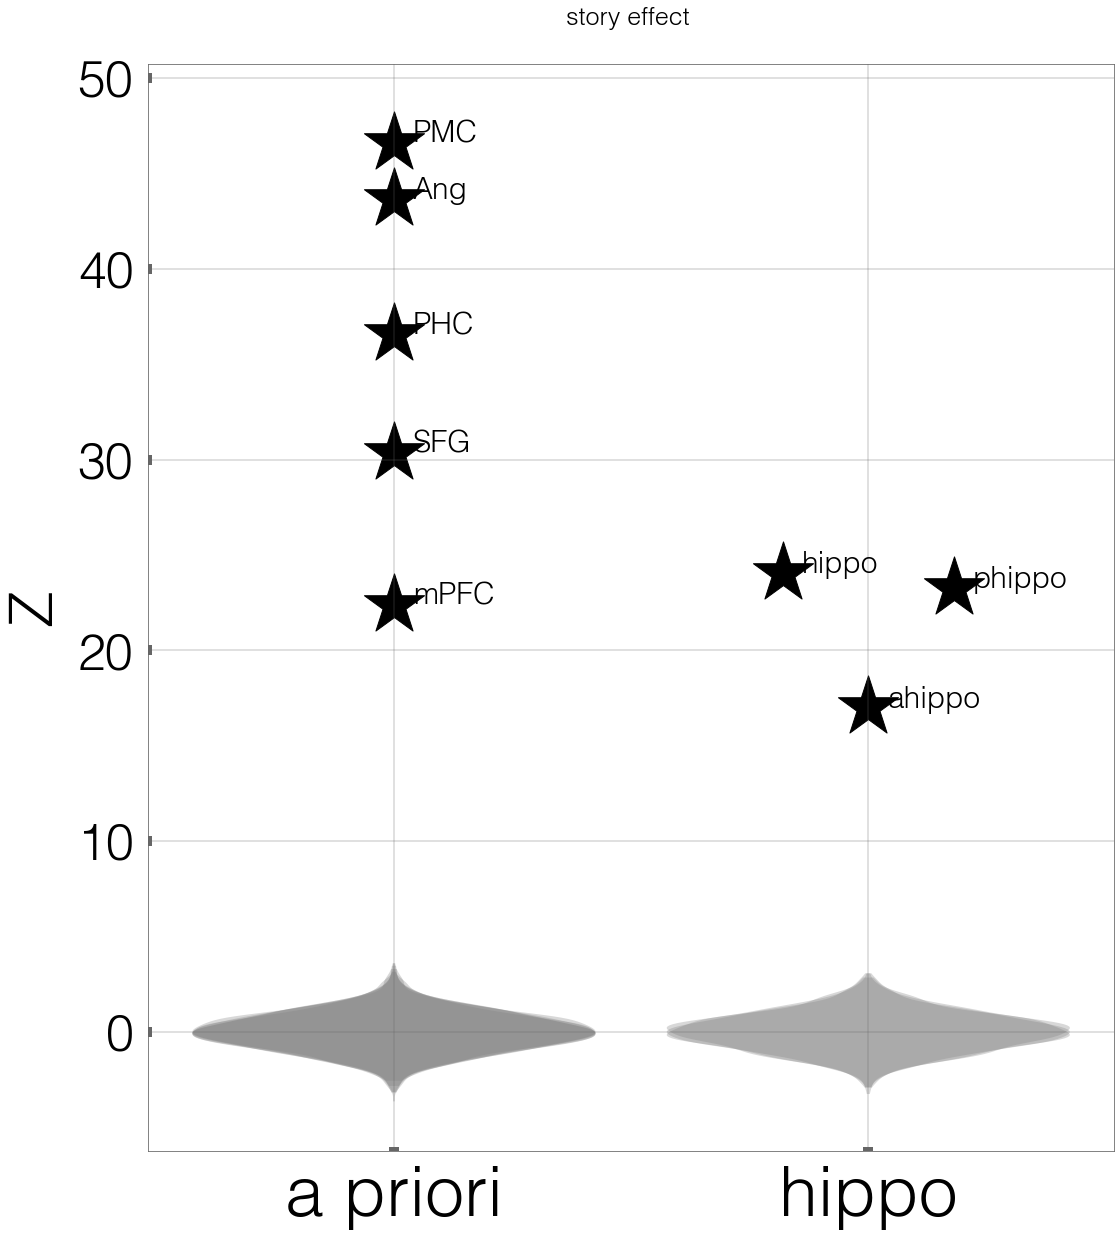

roi: ['mPFC', 'PMC', 'SFG', 'Ang', 'PHC'] eff: [22.8302727  14.48858519 18.71441074  7.58314268  7.82382383]
0.01
roi: Ang eff: schema_effect pval: 0.00100 corrected p: 0.00500
roi: PHC eff: schema_effect pval: 0.00100 corrected p: 0.00500
roi: PMC eff: schema_effect pval: 0.00100 corrected p: 0.00500
roi: SFG eff: schema_effect pval: 0.00100 corrected p: 0.00500
roi: mPFC eff: schema_effect pval: 0.00100 corrected p: 0.00500
roi: ['hippo', 'ahippo', 'phippo'] eff: [10.74576738 19.16638818  1.67195171]
0.016666666666666666
roi: phippo eff: schema_effect pval: 0.09491 corrected p: 0.28472
roi: hippo eff: schema_effect pval: 0.00100 corrected p: 0.00300
roi: ahippo eff: schema_effect pval: 0.00100 corrected p: 0.00300


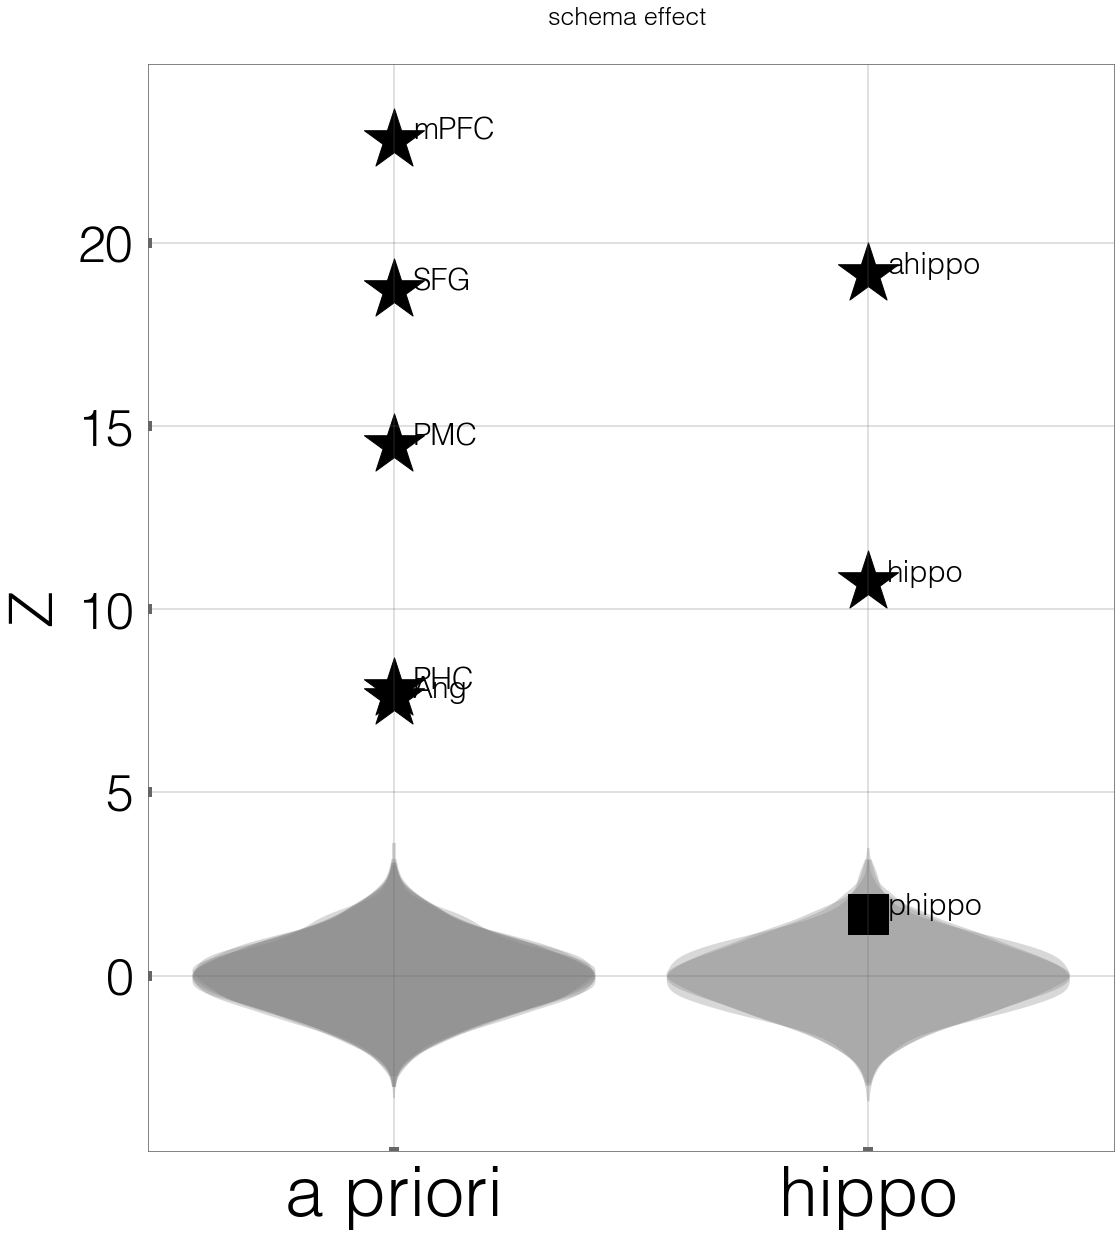

roi: ['mPFC', 'PMC', 'SFG', 'Ang', 'PHC'] eff: [1.70491879 6.44347654 1.43944325 2.49224383 4.61815622]
0.01
roi: SFG eff: story_effect pval: 0.14286 corrected p: 0.71429
roi: mPFC eff: story_effect pval: 0.08492 corrected p: 0.42458
roi: Ang eff: story_effect pval: 0.00899 corrected p: 0.04496
roi: PHC eff: story_effect pval: 0.00100 corrected p: 0.00500
roi: PMC eff: story_effect pval: 0.00100 corrected p: 0.00500
roi: ['hippo', 'ahippo', 'phippo'] eff: [ 1.20412216 -0.74372097  1.75187489]
0.016666666666666666
roi: ahippo eff: story_effect pval: 0.42358 corrected p: 1.27073
roi: hippo eff: story_effect pval: 0.24176 corrected p: 0.72527
roi: phippo eff: story_effect pval: 0.09690 corrected p: 0.29071


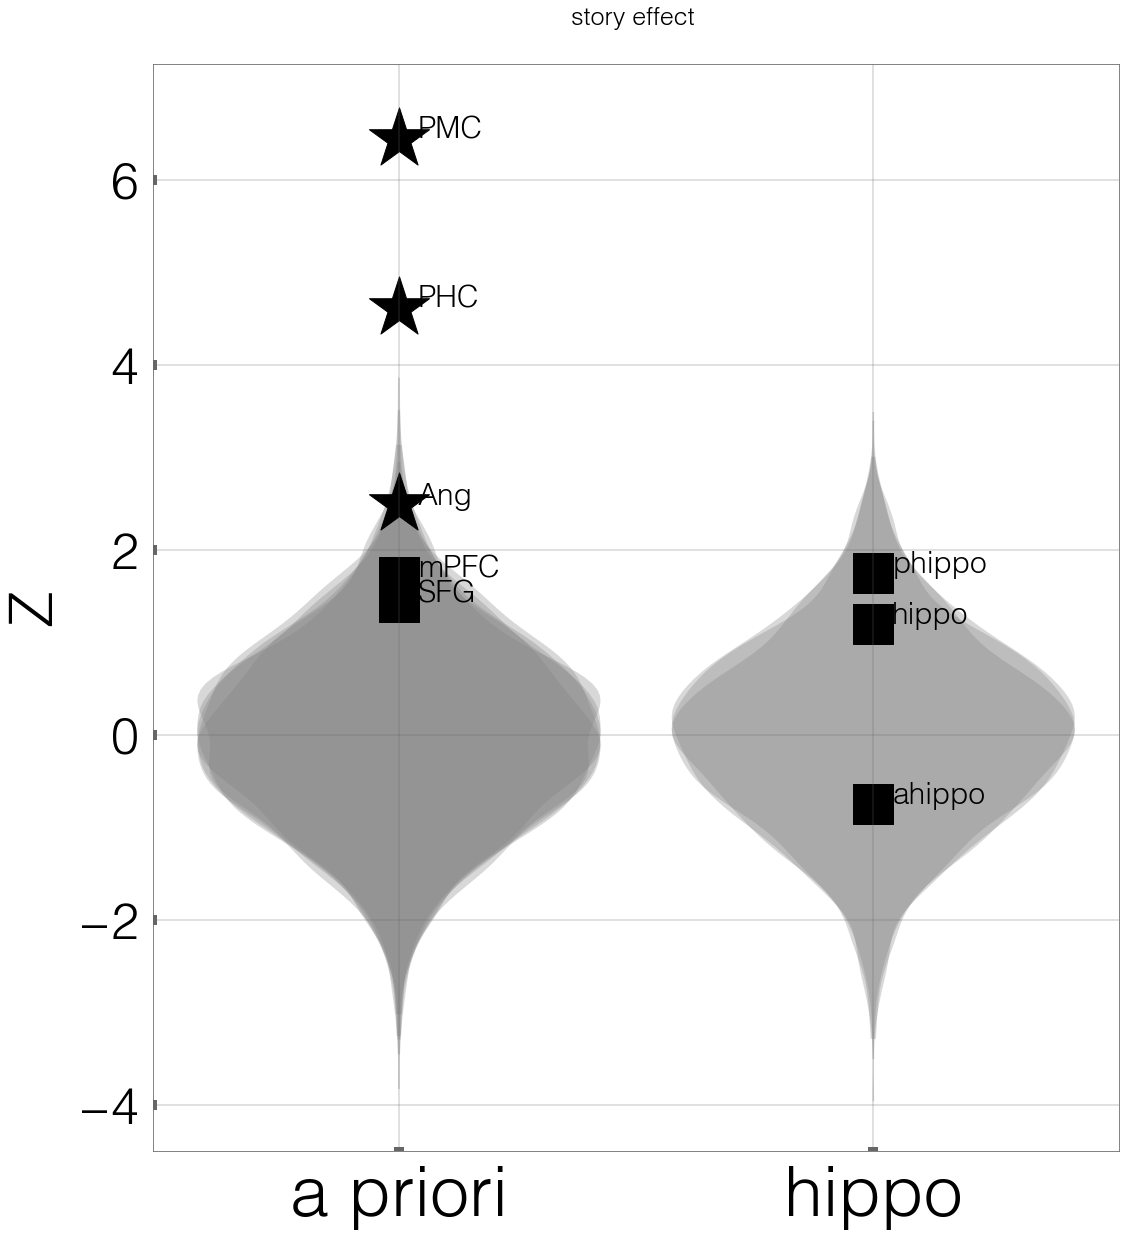

roi: ['mPFC', 'PMC', 'SFG', 'Ang', 'PHC'] eff: [ 0.63931504 18.71240185  1.40321405  5.38781177 15.5011725 ]
0.01
roi: mPFC eff: schema_effect pval: 0.51449 corrected p: 2.57243
roi: SFG eff: schema_effect pval: 0.16583 corrected p: 0.82917
roi: Ang eff: schema_effect pval: 0.00100 corrected p: 0.00500
roi: PHC eff: schema_effect pval: 0.00100 corrected p: 0.00500
roi: PMC eff: schema_effect pval: 0.00100 corrected p: 0.00500
roi: ['hippo', 'ahippo', 'phippo'] eff: [ 8.83626869 16.91707844 -0.78436996]
0.016666666666666666
roi: phippo eff: schema_effect pval: 0.43457 corrected p: 1.30370
roi: hippo eff: schema_effect pval: 0.00100 corrected p: 0.00300
roi: ahippo eff: schema_effect pval: 0.00100 corrected p: 0.00300


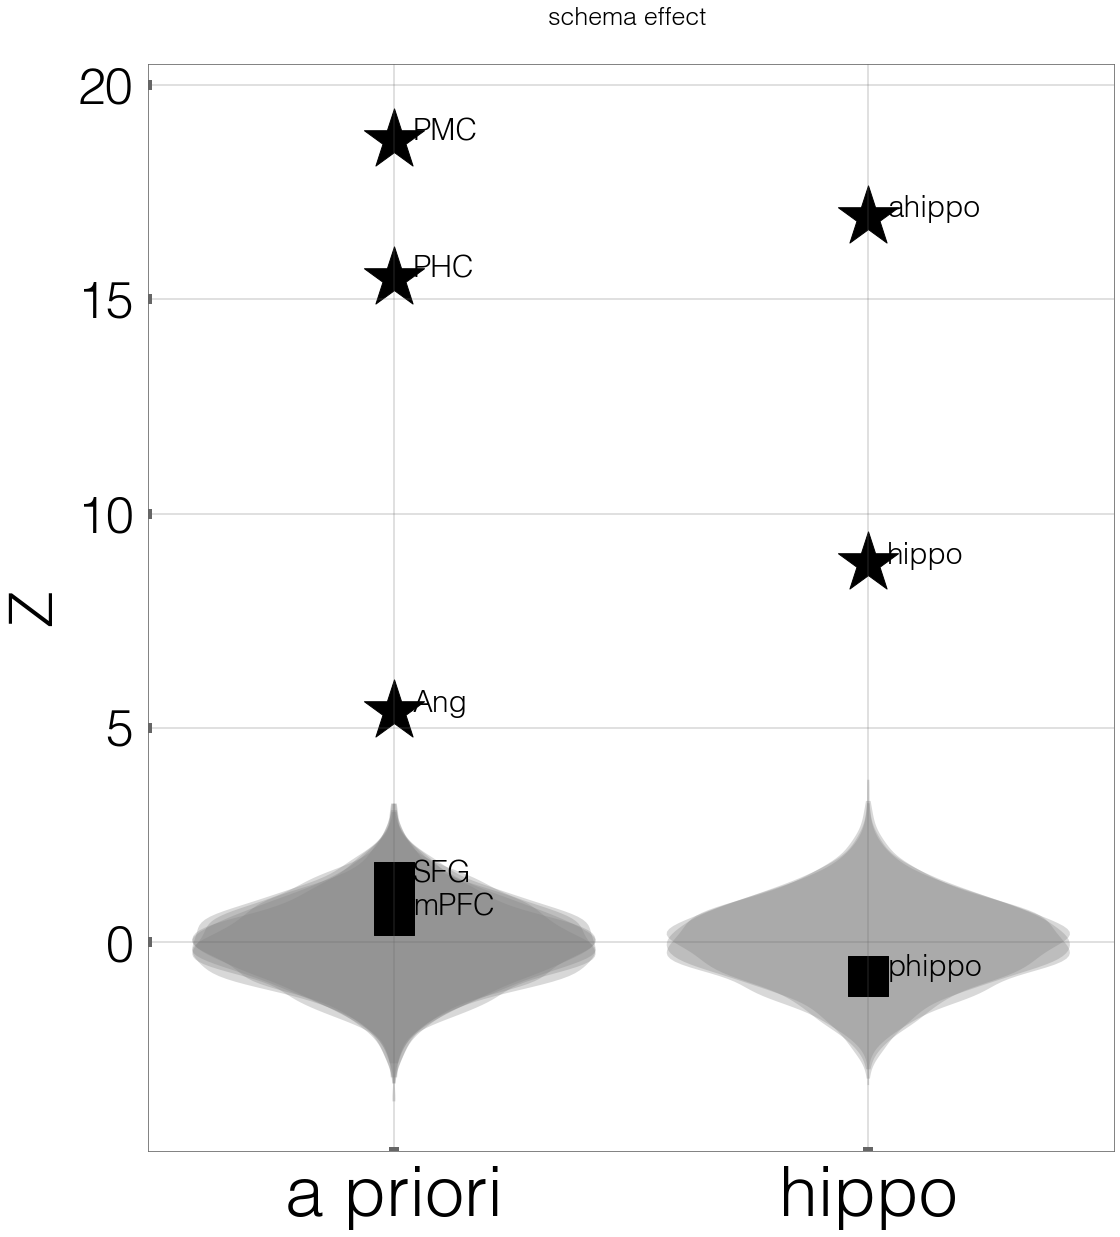

In [9]:

#########################
#########################

main_dir = '../../SchemaBigFiles/_PaperOutputData'

scoretypes = ['roi_percept_score','roi_recall_score']

date = 20211014 #perception stuff with valid_verts mod

## ROIs to plot
apriori_rois = ['mPFC','PMC','SFG','Ang','PHC'] # cortical ROIs
hippo_rois = ['hippo', 'ahippo', 'phippo'] # hippocampal ROIs
# post_rois = ['mPFC_c0','mPFC_c1','mPFC_c2'] #

## Set up Plot Labels
# roi_n_names = tuple(((apriori_rois,hippo_rois, post_rois), (['a priori','hippo','post'])))
roi_n_names = tuple(((apriori_rois,hippo_rois), (['a priori','hippo'])))

## plot count
plot_count = 0


##
### Figure 2 (And Supplemental Figures) 
##

extra = 'within_modality' # Main Figure

# ### Figure 2-Supp 1 (within-subj)
# extra = 'within_modality_within_subj'

# ### Figure 2-Supp2 (across modality)
# extra = 'across_modality'

#########################
#########################


for scoretype in scoretypes:

    path = os.path.join(main_dir,scoretype)

    rois = apriori_rois + hippo_rois# +post_rois
    
    average_results = {key:[] for key in rois}
    
    for roi in rois:

        average_results.update(GetROIStorySchema(date,scoretype,[roi],extra=extra))


    for effect in ['story_effect', 'schema_effect']:

#         plt.figure(figsize=(7,11)) ;
        plt.figure(figsize=(17.3,20))


        # for roitype in [1,2]:
        # for rit, roitype in enumerate([network_rois,other_rois,post_rois]):
        for rit, roitype in enumerate(roi_n_names[0]):#,post_rois]):
        # for rit, roitype in enumerate([other_rois, hippo_rois]):

            eff,effnull, pvals = GetZP(average_results,effect,roitype)
            print("roi: {} eff: {}".format(roitype,eff))

            ### draw nulls
            vp = plt.violinplot(effnull, positions = np.ones(len(roitype))*rit,showextrema=False, widths=.85); #draw null distribution as violin plot
            [v.set_facecolor('gray') for v in vp['bodies']] # set null distributions to color gray
            
            bottom, top = plt.ylim()
            yrange = top-bottom
            

            ### determine significance threshold relative to null in a non-parametric fashion
            alpha = 0.05 / len(roitype) #threshold for significance controling for multiple comparisons
            print(alpha)

            ### plot // annotate figure
            sort_idx = np.argsort(eff)
        #     x_change = [0,0.2,-0.2]
            for ri,roi in enumerate(np.array(roitype)[sort_idx]):
        #         xval = rit+(0.2)*flip  ; flip=flip*-1
        #         xval = rit + x_change[ri%3]
        #             xval = (rit + 0.05) if (ri % 2) == 0 else (rit -0.05)
    
#                 xval = (rit + 0.18) if 'phippo' in roi else (rit - 0.18) if 'hippo'==roi else rit
                xval = (rit + 0.18) if ('phippo' == roi and plot_count==0) else (rit - 0.18) if ('hippo'==roi and plot_count==0) else rit

#                 print(roi, rit,ri,(ri % 2) == 0, xval)
                pval = pvals[sort_idx][ri] #/ (nPerm + 1)
                print("roi: {} eff: {} pval: {:.5f} corrected p: {:.5f}".format(roi, effect, pval,pval*len(roitype)))#"%.5f"%p)
                if pval < alpha:
                    marker = '*' ; size = 4000#360#120
                else:
                    marker = 's' ; size = 1600#160#80

                xoffset = .04# if 'phippo' in roi else  +0.04
                yoffset = 0 #-1*(0.01* yrange) #-0.5#-0.5
#                 print('y offset: ', yoffset)

                plt.scatter(xval, eff[sort_idx][ri],marker=marker,s=size,color='k')
                plt.annotate('{}'.format(roi), (xval+xoffset,eff[sort_idx][ri]+yoffset),color='k',fontsize=30)


        ### additional labels for figure
#         plt.xticks([0,1,2],['apriori','hippo','post hoc'], fontsize=15)

        # plt.xticks([0,1,2],['network', 'apriori','post'], fontsize=15)

#         plt.xlabel("ROIs", fontsize=20);
#         plt.xlabel('xlabel', **hfont)
        


#         sns.despine(top=True, right=True, left=True, bottom=True)

#         plt.gca().set_axisbelow(True)
#         plt.rcParams['axes.axisbelow'] = True
#         ax.grid(zorder=0)

#         plt.minorticks_on()
#         plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
#         plt.grid(b=True, which='major', axis='y',color='#666666', linestyle='-',alpha=0.2,zorder=0)

        sns.despine(top=False, right=False, left=False, bottom=False)
    
        for spine in ['left','right','bottom','top']:
            plt.gca().spines[spine].set_color('#666666')
            
        plt.ylabel('Z', fontsize=60,labelpad=15);
        plt.grid(b=True, which='both', axis='both',color='#666666', linestyle='-',linewidth=2,alpha=0.2,zorder=3)
        plt.tick_params(labelsize=50, width=10, length=4,color='#666666',direction='in',pad=15)
        plt.xticks(range(len(roi_n_names[0])),roi_n_names[1], fontsize=70,**fontfam)
        plt.title("{} {} ".format(effect.split('_')[0], effect.split('_')[1]), fontsize=25,y=1.03,**fontfam);


        ## uncomment this one below 20210927
#         plt.savefig(os.path.join('figs',path.split('/')[-1] + '_{}.png'.format(effect)),transparent=False,dpi=50) #dpi=500
#         plt.savefig(os.path.join('figs',path.split('/')[-1] + '_{}_{}.png'.format(effect,extra)),transparent=False,dpi=50) #dpi=500
#         plt.savefig(os.path.join('figs',path.split('/')[-1] + '_{}_{}.png'.format(effect,extra)),transparent=False,dpi=500) #dpi=500

#         plt.savefig(os.path.join('figs',path.split('/')[-2] + '_{}.png'.format(effect)),transparent=True)
        plt.show()
    
            

        plot_count+=1

        plt.show();
        


In [12]:
ls ../../SchemaBigFiles/_PaperOutputData/sl_recall_score

20211014_ahippo_9999_None_sl_recall_score_within_modality.h5
20211014_Ang_9999_L_sl_recall_score_within_modality.h5
20211014_Ang_9999_R_sl_recall_score_within_modality.h5
20211014_mPFC_9999_L_sl_recall_score_within_modality.h5
20211014_mPFC_9999_R_sl_recall_score_within_modality.h5
20211014_PHC_9999_L_sl_recall_score_within_modality.h5
20211014_PHC_9999_R_sl_recall_score_within_modality.h5
20211014_phippo_9999_None_sl_recall_score_within_modality.h5
20211014_PMC_9999_L_sl_recall_score_within_modality.h5
20211014_PMC_9999_R_sl_recall_score_within_modality.h5
20211014_SFG_9999_R_sl_recall_score_within_modality.h5
20211014_SL_0000_L_sl_recall_score.h5
20211014_SL_0000_R_sl_recall_score.h5
20211014_SL_0001_L_sl_recall_score.h5
20211014_SL_0001_R_sl_recall_score.h5
20211014_SL_0002_L_sl_recall_score.h5
20211014_SL_0002_R_sl_recall_score.h5
20211014_SL_0003_L_sl_recall_score.h5
20211014_SL_0003_R_sl_recall_score.h5
20211014_SL_0004_L_sl_recall_score.h5
20211014_SL_0004_R_sl_recall_score.h5
2

20211014_SL_1249_L_sl_recall_score.h5
20211014_SL_1249_R_sl_recall_score.h5
20211014_SL_1250_L_sl_recall_score.h5
20211014_SL_1250_R_sl_recall_score.h5
20211014_SL_1251_L_sl_recall_score.h5
20211014_SL_1251_R_sl_recall_score.h5
20211014_SL_1252_L_sl_recall_score.h5
20211014_SL_1252_R_sl_recall_score.h5
20211014_SL_1253_L_sl_recall_score.h5
20211014_SL_1253_R_sl_recall_score.h5
20211014_SL_1254_L_sl_recall_score.h5
20211014_SL_1254_R_sl_recall_score.h5
20211014_SL_1255_L_sl_recall_score.h5
20211014_SL_1255_R_sl_recall_score.h5
20211014_SL_1256_L_sl_recall_score.h5
20211014_SL_1256_R_sl_recall_score.h5
20211014_SL_1257_L_sl_recall_score.h5
20211014_SL_1257_R_sl_recall_score.h5
20211014_SL_1258_L_sl_recall_score.h5
20211014_SL_1258_R_sl_recall_score.h5
20211014_SL_1259_L_sl_recall_score.h5
20211014_SL_1259_R_sl_recall_score.h5
20211014_SL_1260_L_sl_recall_score.h5
20211014_SL_1260_R_sl_recall_score.h5
20211014_SL_1261_L_sl_recall_score.h5
20211014_SL_1261_R_sl_recall_score.h5
20211014_SL_

# Figure 3

For main text figures run as is.

For Fig3-Supp3 or Fig2-Supp4*** uncomment the variable ``extra`` to specify whether you want to visualize within_subjects or across_modality results, respectively.


In [10]:
def GetROIRegressions(date = 20200715, scoretype='roi_percept_score', modeltype='predict_rubric', rois =['mPFC','PMC','SFG','Ang','PHC', 'mPFC_c0','mPFC_c1'],extra=''):

    roi_id = 9999
    
    results = {}
    average_results = {}
    coeffs = {}
    
    for roi in rois:
        results[roi] = {}
        average_results[roi] = {} #{'story_effect': [], 'schema_effect': []}
        coeffs[roi]={} #{'story_coeff': [], 'schema_coeff': []}

        hems = ['L','R'] if 'hippo' not in roi else ['None'] 
        
        for measure in ['story_effect','schema_effect','story_coeff','schema_coeff','story_corr','schema_corr']: #data_labels:
            results[roi][measure] = []

            for hem in hems:

                fname = '{date}_{roi}_{roi_id:04d}_{hem}_{scoretype}_{modeltype}_{extra}.h5'.format(date=date, roi=roi, roi_id=roi_id,hem=hem, scoretype=scoretype,modeltype = modeltype,extra=extra)

                ## average out subject and story dimension
                try:
                    results[roi][measure].append(dd.io.load(os.path.join(path,fname), '/' + hem + '/' + measure))


                except Exception as e: 
                    print(e)
                    temp = np.full(nPerm+1,fill_value=np.nan) if "effect" in measure or "coeff" in measure else np.nan
                    results[roi][measure].append(temp)

            print(measure,  np.shape(results[roi][measure]))
            results[roi][measure] = np.nanmean(results[roi][measure],axis=0)

    return results
    

story_effect (2, 1001)
schema_effect (2, 1001)
story_coeff (2, 30, 1001)
schema_coeff (2, 30, 1001)
story_corr (2,)
schema_corr (2,)
story_effect (2, 1001)
schema_effect (2, 1001)
story_coeff (2, 30, 1001)
schema_coeff (2, 30, 1001)
story_corr (2,)
schema_corr (2,)
story_effect (2, 1001)
schema_effect (2, 1001)
story_coeff (2, 30, 1001)
schema_coeff (2, 30, 1001)
story_corr (2,)
schema_corr (2,)
story_effect (2, 1001)
schema_effect (2, 1001)
story_coeff (2, 30, 1001)
schema_coeff (2, 30, 1001)
story_corr (2,)
schema_corr (2,)
story_effect (2, 1001)
schema_effect (2, 1001)
story_coeff (2, 30, 1001)
schema_coeff (2, 30, 1001)
story_corr (2,)
schema_corr (2,)
story_effect (1, 1001)
schema_effect (1, 1001)
story_coeff (1, 30, 1001)
schema_coeff (1, 30, 1001)
story_corr (1,)
schema_corr (1,)
story_effect (1, 1001)
schema_effect (1, 1001)
story_coeff (1, 30, 1001)
schema_coeff (1, 30, 1001)
story_corr (1,)
schema_corr (1,)
story_effect (1, 1001)
schema_effect (1, 1001)
story_coeff (1, 30, 10

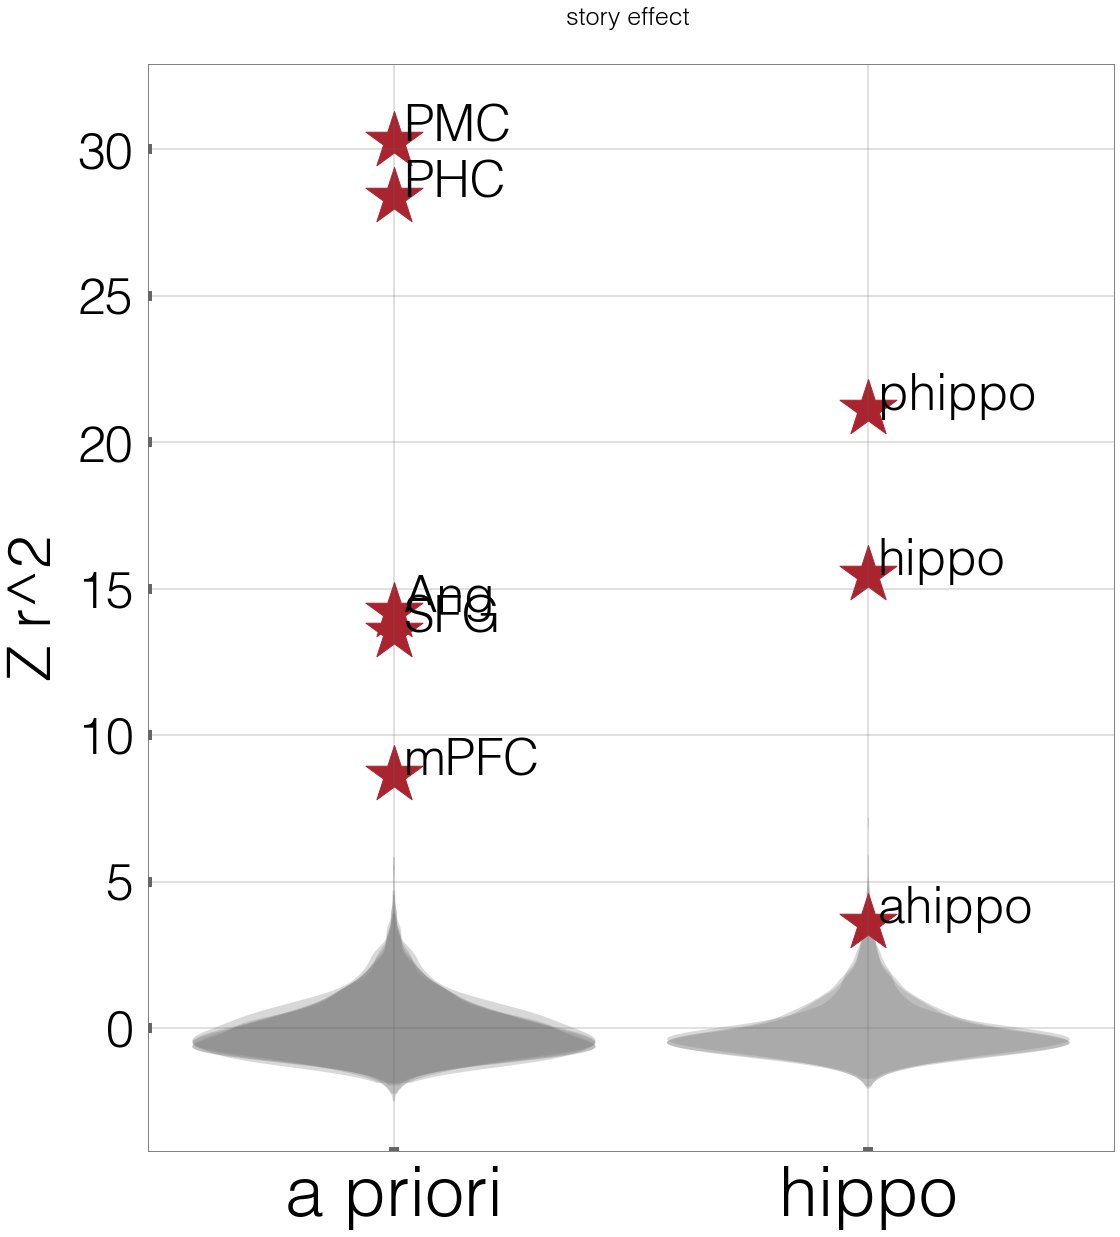

roi: ['mPFC', 'PMC', 'SFG', 'Ang', 'PHC'] eff: [ 1.37891468 -0.51798063  0.92661649 -0.07732564 -1.08797472] corr: [ 0.12976142 -0.06152455 -0.03062224 -0.03496362 -0.00814128]
0.01 | PHC | 0.3226773226773227 | 0.3226773226773227
roi: PHC eff: schema_effect pval: 0.32268 corrected p: 1.61339
0.01 | PMC | 0.7552447552447552 | 0.7552447552447552
roi: PMC eff: schema_effect pval: 0.75524 corrected p: 3.77622
0.01 | Ang | 0.7292707292707292 | 0.7292707292707292
roi: Ang eff: schema_effect pval: 0.72927 corrected p: 3.64635
0.01 | SFG | 0.8721278721278721 | 0.8721278721278721
roi: SFG eff: schema_effect pval: 0.87213 corrected p: 4.36064
0.01 | mPFC | 0.09090909090909091 | 0.09090909090909091
roi: mPFC eff: schema_effect pval: 0.09091 corrected p: 0.45455
roi: ['hippo', 'ahippo', 'phippo'] eff: [-0.88547854  2.93916675  6.81955547] corr: [-0.01007779  0.10996541 -0.14028361]
0.016666666666666666 | hippo | 0.14085914085914086 | 0.14085914085914086
roi: hippo eff: schema_effect pval: 0.14086 

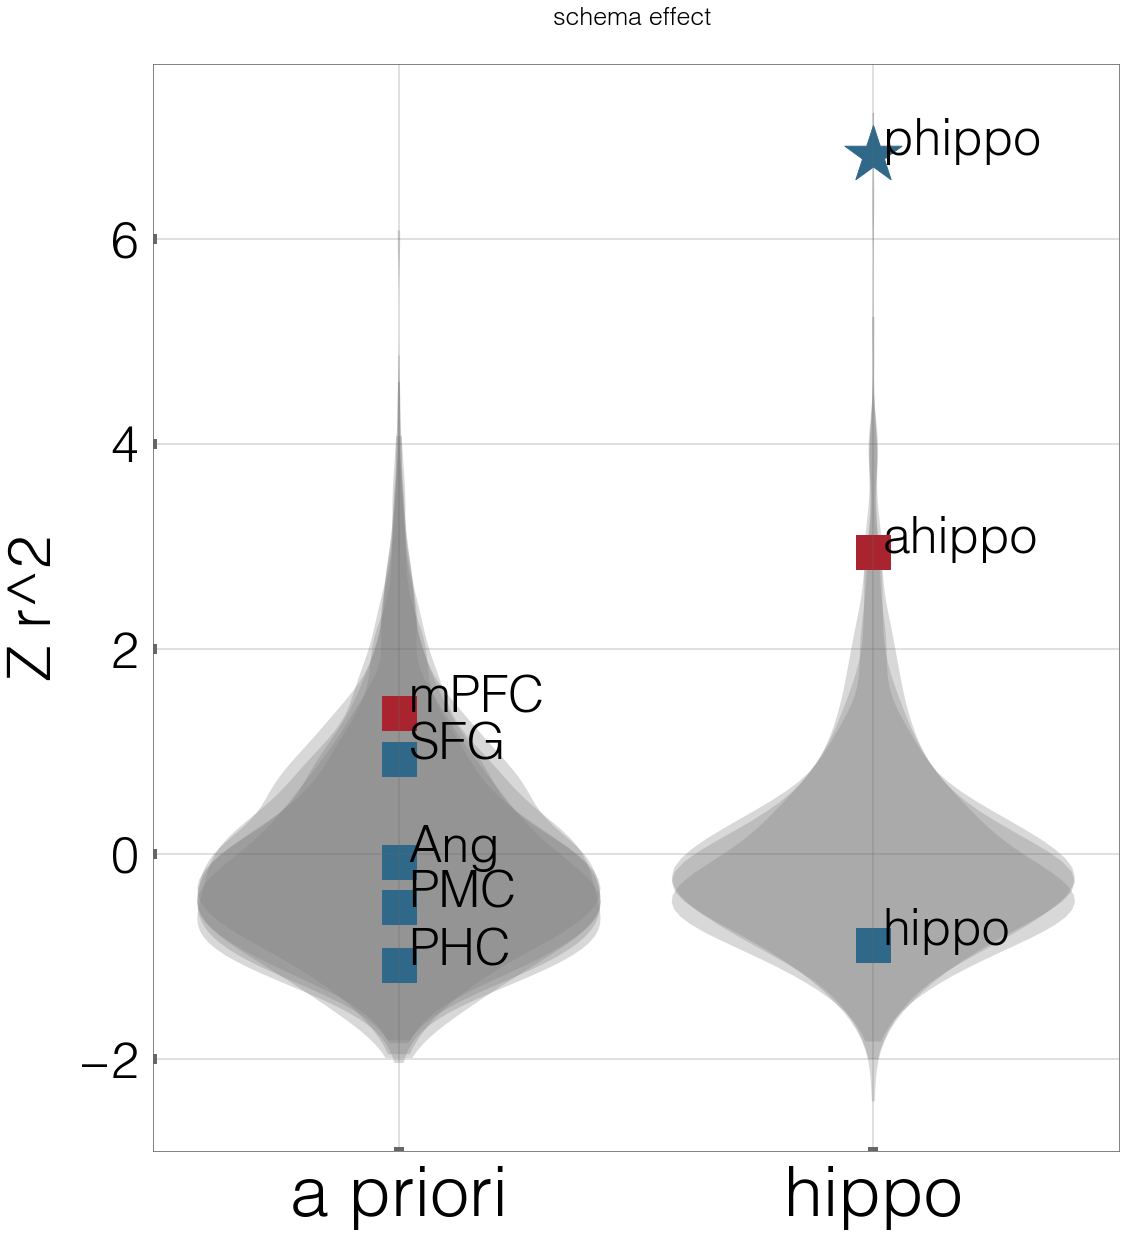

story_effect (2, 1001)
schema_effect (2, 1001)
story_coeff (2, 30, 1001)
schema_coeff (2, 30, 1001)
story_corr (2,)
schema_corr (2,)
story_effect (2, 1001)
schema_effect (2, 1001)
story_coeff (2, 30, 1001)
schema_coeff (2, 30, 1001)
story_corr (2,)
schema_corr (2,)
story_effect (2, 1001)
schema_effect (2, 1001)
story_coeff (2, 30, 1001)
schema_coeff (2, 30, 1001)
story_corr (2,)
schema_corr (2,)
story_effect (2, 1001)
schema_effect (2, 1001)
story_coeff (2, 30, 1001)
schema_coeff (2, 30, 1001)
story_corr (2,)
schema_corr (2,)
story_effect (2, 1001)
schema_effect (2, 1001)
story_coeff (2, 30, 1001)
schema_coeff (2, 30, 1001)
story_corr (2,)
schema_corr (2,)
story_effect (1, 1001)
schema_effect (1, 1001)
story_coeff (1, 30, 1001)
schema_coeff (1, 30, 1001)
story_corr (1,)
schema_corr (1,)
story_effect (1, 1001)
schema_effect (1, 1001)
story_coeff (1, 30, 1001)
schema_coeff (1, 30, 1001)
story_corr (1,)
schema_corr (1,)
story_effect (1, 1001)
schema_effect (1, 1001)
story_coeff (1, 30, 10

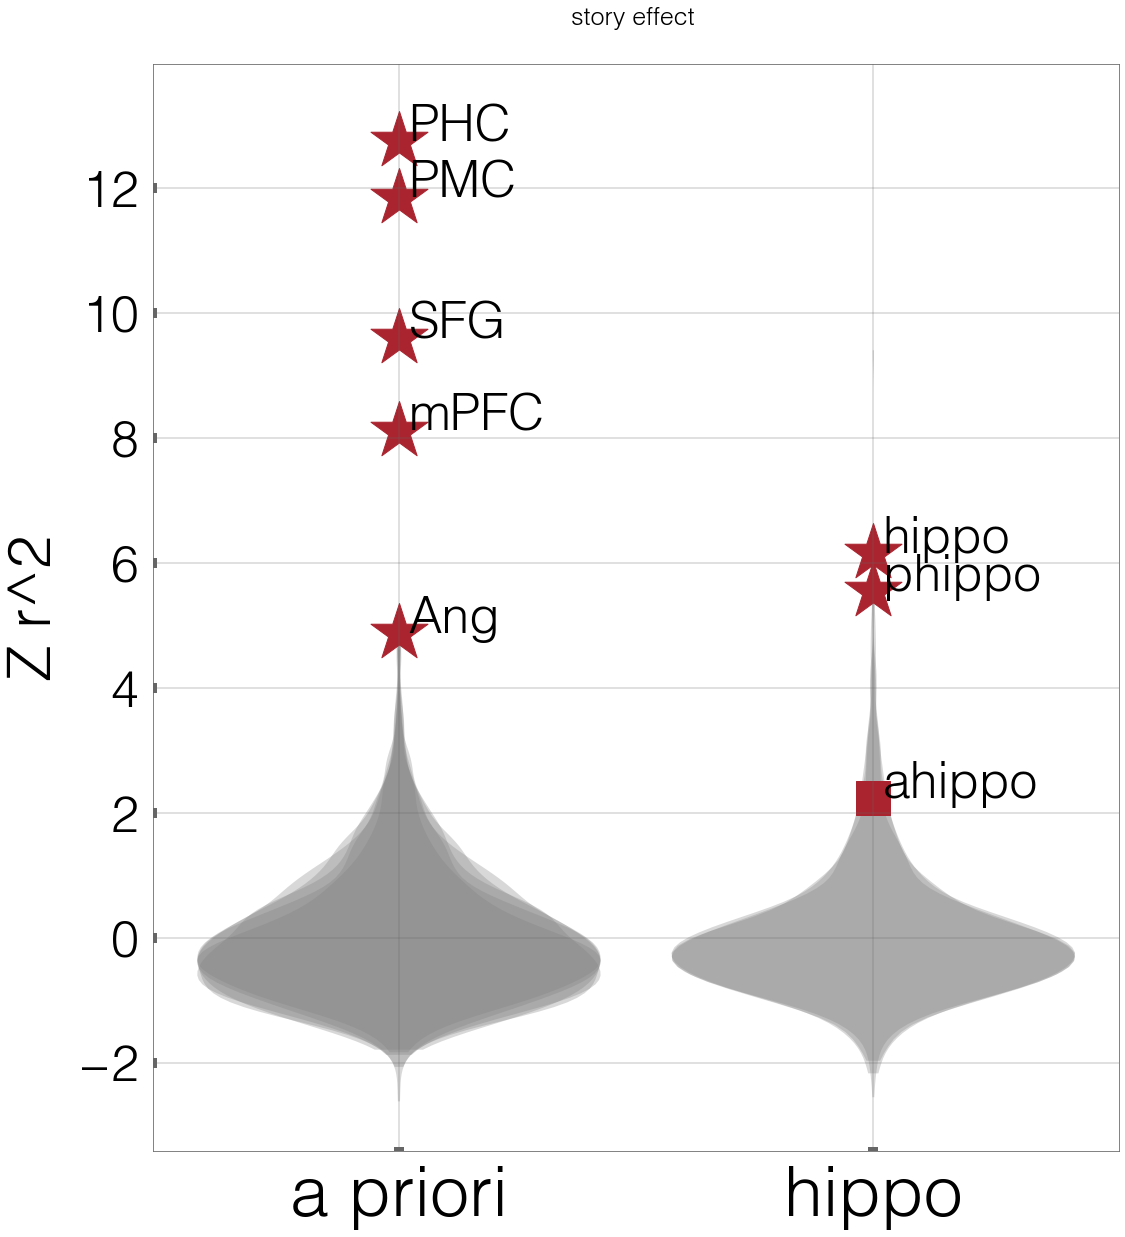

roi: ['mPFC', 'PMC', 'SFG', 'Ang', 'PHC'] eff: [-0.24391391 -0.99479162 -1.05628814 -1.25207148  0.06184626] corr: [ 0.04318453 -0.00397977  0.00259837  0.01395162  0.04318378]
0.01 | Ang | 0.04795204795204795 | 0.04795204795204795
roi: Ang eff: schema_effect pval: 0.04795 corrected p: 0.23976
0.01 | SFG | 0.1088911088911089 | 0.1088911088911089
roi: SFG eff: schema_effect pval: 0.10889 corrected p: 0.54446
0.01 | PMC | 0.1258741258741259 | 0.1258741258741259
roi: PMC eff: schema_effect pval: 0.12587 corrected p: 0.62937
0.01 | mPFC | 0.4925074925074925 | 0.4925074925074925
roi: mPFC eff: schema_effect pval: 0.49251 corrected p: 2.46254
0.01 | PHC | 0.7932067932067932 | 0.7932067932067932
roi: PHC eff: schema_effect pval: 0.79321 corrected p: 3.96603
roi: ['hippo', 'ahippo', 'phippo'] eff: [ 0.44226047 -1.55597252 -1.11157132] corr: [-0.07544919 -0.0362303   0.02282956]
0.016666666666666666 | ahippo | 0.02197802197802198 | 0.02197802197802198
roi: ahippo eff: schema_effect pval: 0.0219

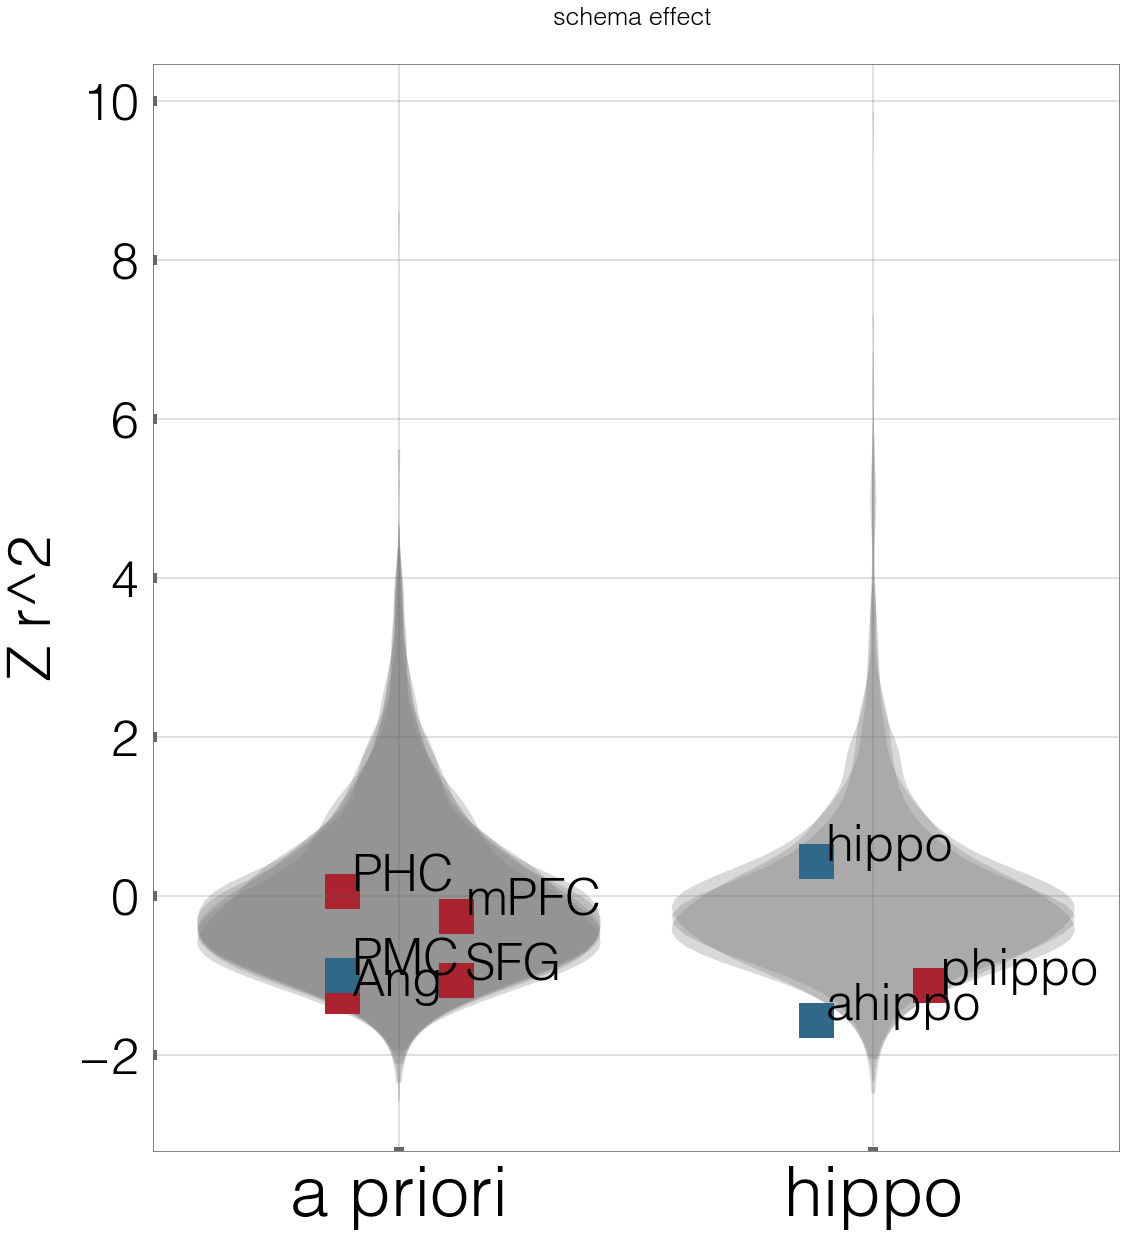

In [11]:

#########################
#########################

main_dir = '../../SchemaBigFiles/_PaperOutputData'

scoretypes = ['roi_percept_score'] #,'roi_recall_score']

date = 20211014 #perception stuff with valid_verts mod

## ROIs to plot
apriori_rois = ['mPFC','PMC','SFG','Ang','PHC'] # cortical ROIs
hippo_rois = ['hippo', 'ahippo', 'phippo'] # hippocampal ROIs
# post_rois = ['mPFC_c0','mPFC_c1','mPFC_c2'] #

## Set up Plot Labels
# roi_n_names = tuple(((apriori_rois,hippo_rois, post_rois), (['a priori','hippo','post'])))
roi_n_names = tuple(((apriori_rois,hippo_rois), (['a priori','hippo'])))

## plot count
plot_count = 0


##
### Figure 2 (And Supplemental Figures) 
##

extra = 'within_modality' # Main Figure

# ### Figure 2-Supp 1 (within-subj)
# extra = 'within_modality_within_subj'

# ### Figure 2-Supp2 (across modality)
# extra = 'across_modality'

#########################
#########################


for regressor in ['percept', 'recall']:
    
    
    scoretype = 'roi_{}_score'.format(regressor) #sy
    modeltype = "predict_rubric" #'predict_wv_euc_schema'#'predict_raw_wv_schema' # "predict_0f_wv_schema"  / "predict_rubric"  / 'predict_raw_wv_schema'
    path = os.path.join(main_dir,'roi_{}_score_predictions/'.format(regressor))
    
    rois = apriori_rois + hippo_rois# +post_rois

    average_results = {key:[] for key in rois}
    
    for roi in rois:
        average_results.update(GetROIRegressions(date,scoretype,modeltype,[roi],extra))
    
    
    for effect in ['story_effect','schema_effect']:
#         plt.figure(figsize=(7,11))
        plt.figure(figsize=(17.3,20))
        for rit, roitype in enumerate(roi_n_names[0]):
            
            coefeff = 'schema_corr' if effect=='schema_effect' else 'story_corr'
            effsign = np.array([average_results[roi][coefeff] for roi in roitype])

            eff, effnull, pvals = GetZP(average_results,effect,roitype)
            print("roi: {} eff: {} corr: {}".format(roitype,eff,effsign))

            ### draw nulls
            vp = plt.violinplot(effnull, positions = np.ones(len(roitype))*rit,showextrema=False,widths=0.85); #draw null distribution as violin plot
            [v.set_facecolor('gray') for v in vp['bodies']] # set null distributions to color gray

            ### determine significance threshold relative to null in a non-parametric fashion
            alpha = 0.05 / len(roitype) #threshold for significance controling for multiple comparisons

            ### annotate figure 
            flip = -1
            sort_idx = np.argsort(eff) 
#             for ri,roi in enumerate(roitype):
            for ri,roi in enumerate(np.array(roitype)[sort_idx]):
        #         xval = rit+(0.05)*flip  ; flip=flip*-1
        #         xval = rit #np.random.choice([rit-0.2,rit+.2,rit,rit]) * np.random.normal(1,.05)

                xval =  rit if plot_count!=3 else rit+(0.12)*flip  ; flip=flip*-1
#                 color = 'red' if effsign[ri] > 0 else 'blue'
                color = '#aa242f' if effsign[sort_idx][ri] > 0 else '#306889'
                pval = pvals[sort_idx][ri] #proportion[ri] / (nPerm + 1)
                print('{} | {} | {} | {}'.format(alpha,roi,pvals[sort_idx][ri],pval))
                print("roi: {} eff: {} pval: {:.5f} corrected p: {:.5f}".format(roi, effect, pval,pval*len(roitype)))#"%.5f"%p)

                if pval < alpha:
                    marker = '*' ; size = 3600#360#120
                else:
                    marker = 's' ; size = 1200#160#80

                plt.scatter(xval,eff[sort_idx][ri],marker=marker,s=size,color=color);

                ann = plt.annotate('{}'.format(roi), (xval+0.02,eff[sort_idx][ri]),color='k',fontsize=50)


        ### additional labels for figure
        # plt.xticks([0,1,2,3,4],['network', 'apriori', 'post','cluster','hippo'], fontsize=15)


#         plt.ylabel('z r^2', fontsize=20);
#         plt.xlabel("ROIs", fontsize=20);
#         plt.title("{} {}".format(effect.split('_')[0], effect.split('_')[1]), fontsize=25,y=1.03);

#         sns.despine(top=True, right=True, left=True, bottom=True)
        sns.despine(top=False, right=False, left=False, bottom=False)
    
        for spine in ['left','right','bottom','top']:
            plt.gca().spines[spine].set_color('#666666')
        
        plt.ylabel('Z r^2', fontsize=60,labelpad=15);
        plt.grid(b=True, which='both', axis='both',color='#666666', linestyle='-',linewidth=2,alpha=0.2,zorder=3)
        plt.tick_params(labelsize=50, width=10, length=4,color='#666666',direction='in',pad=15)
        plt.xticks(range(len(roi_n_names[0])),roi_n_names[1], fontsize=70,**fontfam)
        plt.title("{} {} ".format(effect.split('_')[0], effect.split('_')[1]), fontsize=25,y=1.03,**fontfam);



        plot_count+=1
#         plt.savefig(os.path.join('figs',path.split('/')[-2] + '_{}.png'.format(effect)),transparent=False,dpi=50) #dpi=400
#         plt.savefig(os.path.join('figs',path.split('/')[-2] + '_{}_{}.png'.format(effect,extra)),transparent=False,dpi=50) #dpi=400
#         plt.savefig(os.path.join('figs',path.split('/')[-2] + '_{}_{}.png'.format(effect,extra)),transparent=False,dpi=500) #dpi=400

        plt.show()
        




In [13]:
ls ../../SchemaBigFiles/_PaperOutputData/roi_percept_score_predictions

20211014_ahippo_9999_None_roi_percept_score_predict_rubric_within_modality.h5
20211014_Ang_9999_L_roi_percept_score_predict_rubric_within_modality.h5
20211014_Ang_9999_R_roi_percept_score_predict_rubric_within_modality.h5
20211014_hippo_9999_None_roi_percept_score_predict_rubric_within_modality.h5
20211014_mPFC_9999_L_roi_percept_score_predict_rubric_within_modality.h5
20211014_mPFC_9999_R_roi_percept_score_predict_rubric_within_modality.h5
20211014_PHC_9999_L_roi_percept_score_predict_rubric_within_modality.h5
20211014_PHC_9999_R_roi_percept_score_predict_rubric_within_modality.h5
20211014_phippo_9999_None_roi_percept_score_predict_rubric_within_modality.h5
20211014_PMC_9999_L_roi_percept_score_predict_rubric_within_modality.h5
20211014_PMC_9999_R_roi_percept_score_predict_rubric_within_modality.h5
20211014_SFG_9999_L_roi_percept_score_predict_rubric_within_modality.h5
20211014_SFG_9999_R_roi_percept_score_predict_rubric_within_modality.h5


In [31]:
ls ../../SchemaBigFiles/_PaperOutputData/roi_percept_score_predictions/

20211014_ahippo_9999_None_roi_percept_score_predict_rubric_within_modality.h5
20211014_ahippo_9999_None_roi_percept_score_predict_rubric_within_modality_within_subj.h5
20211014_Ang_9999_L_roi_percept_score_predict_rubric_within_modality.h5
20211014_Ang_9999_R_roi_percept_score_predict_rubric_within_modality.h5
20211014_Ang_9999_R_roi_percept_score_predict_rubric_within_modality_within_subj.h5
20211014_hippo_9999_None_roi_percept_score_predict_rubric_within_modality.h5
20211014_hippo_9999_None_roi_percept_score_predict_rubric_within_modality_within_subj.h5
20211014_mPFC_9999_L_roi_percept_score_predict_rubric_within_modality.h5
20211014_mPFC_9999_L_roi_percept_score_predict_rubric_within_modality_within_subj.h5
20211014_mPFC_9999_R_roi_percept_score_predict_rubric_within_modality.h5
20211014_mPFC_9999_R_roi_percept_score_predict_rubric_within_modality_within_subj.h5
20211014_PHC_9999_L_roi_percept_score_predict_rubric_within_modality.h5
20211014_PHC_9999_L_roi_percept_score_predict_rubr

### Figure 3 - encoding schema effects in anterior vs posterior hippocampus

Comparison between encoding schema effect in anterior vs posterior hippocampus.

In [20]:


#### LOAD SCORES
def GetStorySchemaScore(date,roi,roi_id,hem,scoretype,event='all',extra='within_modality'):


    path = '../../SchemaBigFiles/_PaperOutputData/{}'.format(scoretype)

    subj_selection = has_R if 'percept' in scoretype.split('_') else np.full(30,fill_value=True) #recalls only have 30 subj

    fname = '{date}_{roi}_{roi_id:04d}_{hem}_{scoretype}_{extra}.h5'.format(date=date, roi=roi, roi_id=roi_id,
                                                                hem=hem, scoretype=scoretype,extra=extra)

    score = {}
    for eff in ['story_effect','schema_effect']:
        score[eff] = dd.io.load(os.path.join(path,fname), '/' + hem + '/'+ eff )[subj_selection,:]
        
        if event=='all':
            score[eff] = np.nanmean(score[eff][:,:,:,0],axis=2) #average out the event dimension, select raw data (not permtuation)
        else:
            score[eff] = score[eff][:,:,event,0]
        
    return score


### RUN ROI regression analysis
nSubj = 30
rois = ['ahippo', 'phippo']
rubric_scores = openObject('normalizedRubricScores_byStory.pkl')
outcome_scores = rubric_scores.copy()

fit_intercept = True ; remThresh = -1 ; alphaval = 0.00 #.5 #0.5 #1#5#0.1 #1 #5 #1.1 #.5 #1e-1 #1e-4 # 1e-9 

r2s = {}
# r2s = np.zeros((nSubj, len(rois)))

for i,roi in enumerate(rois):
    
    r2s[roi] = {}
    
    ### our 'X' in the regression
    for scoretype in ['roi_percept_score', 'roi_recall_score']:
        
        r2s[roi][scoretype] = {}
        date = 20211014
        hem = 'None' 
        roi = roi
        roi_id = 9999 
#         scoretype = 'roi_percept_score' 
        input_scores = GetStorySchemaScore(date,roi,roi_id,hem,scoretype,event='all'); #load scores

        for eff in ['story_effect', 'schema_effect']:# ,'schema_effect']:
            

            r2s[roi][scoretype][eff] = np.zeros((nSubj, len(rois)))

            predictor = input_scores[eff][:,:,np.newaxis].copy()


            all_pred,all_true,all_baseline,test_r2s,regcoef,reginter = linear_reg(predictor,
                                                                                      outcome_scores,
                                                                              rubric_scores,
                                                                          fit_intercept=fit_intercept,
                                                                          remThresh = remThresh,
                                                                          alphain=alphaval,
                                                                            printr2=True)

            r2s[roi][scoretype][eff][:,i] = regcoef#test_r2s



Ttest_1sampResult(statistic=-74.74600843144644, pvalue=1.0142985942165517e-34)


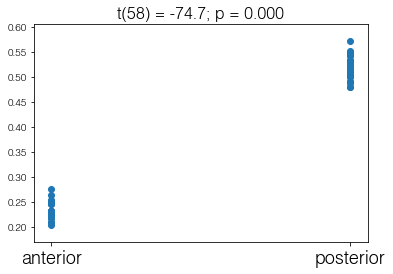

In [21]:
import scipy.stats as stats


scoretype = 'roi_percept_score'
eff = 'story_effect'

ahippo = r2s['ahippo'][scoretype][eff][:,0]
phippo = r2s['phippo'][scoretype][eff][:,1]

print(stats.ttest_1samp(ahippo - phippo,0,)) #anterior - posterior hippo
plt.figure()
t,p = stats.ttest_1samp(ahippo - phippo,0,)
# plt.bar([0,1],[np.mean(r2s[:,0]), np.mean(r2s[:,1])],alpha=0.5)
plt.scatter([np.ones(30)*0,np.ones(30)*1], [ahippo, phippo])
plt.xticks([0,1],["anterior", "posterior"], fontsize=18);
plt.title("t(58) = {:.1f}; p = {:.3f}".format(t,p),fontsize=16);



Ttest_1sampResult(statistic=107.00996966363286, pvalue=3.184578414975665e-39)


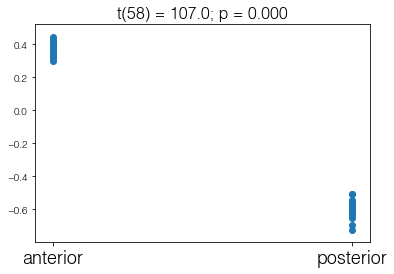

In [22]:
import scipy.stats as stats


scoretype = 'roi_percept_score'
eff = 'schema_effect'

ahippo = r2s['ahippo'][scoretype][eff][:,0]
phippo = r2s['phippo'][scoretype][eff][:,1]

print(stats.ttest_1samp(ahippo - phippo,0,)) #anterior - posterior hippo
plt.figure()
t,p = stats.ttest_1samp(ahippo - phippo,0,)
# plt.bar([0,1],[np.mean(r2s[:,0]), np.mean(r2s[:,1])],alpha=0.5)
plt.scatter([np.ones(30)*0,np.ones(30)*1], [ahippo, phippo])
plt.xticks([0,1],["anterior", "posterior"], fontsize=18);
plt.title("t(58) = {:.1f}; p = {:.3f}".format(t,p),fontsize=16);



Ttest_1sampResult(statistic=-27.4532367454173, pvalue=2.6451899505794746e-22)


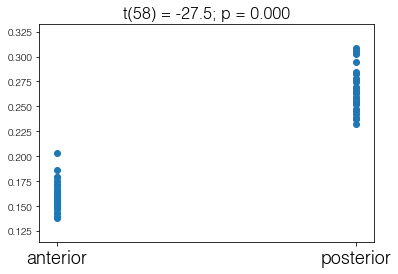

In [23]:
import scipy.stats as stats


scoretype = 'roi_recall_score'
eff = 'story_effect'

ahippo = r2s['ahippo'][scoretype][eff][:,0]
phippo = r2s['phippo'][scoretype][eff][:,1]

print(stats.ttest_1samp(ahippo - phippo,0,)) #anterior - posterior hippo
plt.figure()
t,p = stats.ttest_1samp(ahippo - phippo,0,)
# plt.bar([0,1],[np.mean(r2s[:,0]), np.mean(r2s[:,1])],alpha=0.5)
plt.scatter([np.ones(30)*0,np.ones(30)*1], [ahippo, phippo])
plt.xticks([0,1],["anterior", "posterior"], fontsize=18);
plt.title("t(58) = {:.1f}; p = {:.3f}".format(t,p),fontsize=16);



In [25]:
import scipy.stats as stats


In [ ]:
stats.ttest_1samp(r2s[:,0] - r2s[:,1],0,)

Ttest_1sampResult(statistic=107.00996966363286, pvalue=3.184578414975665e-39)


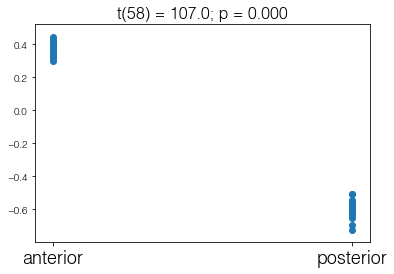

In [50]:
import scipy.stats as stats

print(stats.ttest_1samp(r2s[:,0] - r2s[:,1],0,)) #anterior - posterior hippo

t,p = stats.ttest_1samp(r2s[:,0] - r2s[:,1],0,)
# plt.bar([0,1],[np.mean(r2s[:,0]), np.mean(r2s[:,1])],alpha=0.5)
plt.scatter([np.ones(30)*0,np.ones(30)*1], [r2s[:,0], r2s[:,1]])
plt.xticks([0,1],["anterior", "posterior"], fontsize=18);
plt.title("t(58) = {:.1f}; p = {:.3f}".format(t,p),fontsize=16);

# Figure 5; mPFC cluster results

In [37]:
stype.split('_')[2]

['roi', 'recall', 'score']

In [51]:
main_dir = '../../SchemaBigFiles/_PaperOutputData'

date = 20211014 
extra = 'within_modality'

### create DF to for easy seaborn plotting later
columns = ['z','p','scoretype','sig','roi']
rows = np.zeros((1,len(columns)))
df = pd.DataFrame(data=rows,columns=columns)

alpha=0.05

roinum = 0

roitype = [['mPFC_k2_c0','mPFC_k2_c1']]#[post_rois]

for roi_list in roitype:

    for stype in ['roi_percept_score', 'roi_recall_score']:
        
        ### story or schema scores
        path = os.path.join(main_dir,stype) 
        roistoryschema = GetROIStorySchema(date,stype,rois=roi_list,extra=extra)
        
        ### story or schema scores to behavior
        modeltype = "predict_rubric"
        regressor = stype.split('_')[1] #percept or recall
        path = os.path.join(main_dir,'roi_{}_score_predictions/'.format(regressor))
        roiregressions = GetROIRegressions(date,stype,modeltype=modeltype,rois=roi_list,extra=extra) 
        
        for stsc_avg,mtype in zip([roistoryschema,roiregressions],["None",modeltype]):
        
            for effect in ['story_effect','schema_effect']:
            
                eff,null,pval = GetZP(stsc_avg,effect,roi_list)

                for i,r in enumerate(roi_list):
                    
                    ## valuable numbers in post-hoc analysis are relative z-values 
                    
                    sig = True if pval[i]<=(alpha/len(roi_list)) else False
                    z = eff[i]
                    p = pval[i]
                    roi = r
                    scoretype_long = stype + '_' + effect + "_" + mtype
                    ['z','p','scoretype','sig','roi']
                    df.loc[roinum] = [z,p,scoretype_long,sig,roi]
                    roinum += 1


story_effect (2, 1001)
schema_effect (2, 1001)
story_coeff (2, 30, 1001)
schema_coeff (2, 30, 1001)
story_corr (2,)
schema_corr (2,)
story_effect (2, 1001)
schema_effect (2, 1001)
story_coeff (2, 30, 1001)
schema_coeff (2, 30, 1001)
story_corr (2,)
schema_corr (2,)
story_effect (2, 1001)
schema_effect (2, 1001)
story_coeff (2, 30, 1001)
schema_coeff (2, 30, 1001)
story_corr (2,)
schema_corr (2,)
story_effect (2, 1001)
schema_effect (2, 1001)
story_coeff (2, 30, 1001)
schema_coeff (2, 30, 1001)
story_corr (2,)
schema_corr (2,)


In [34]:
ls ../../SchemaBigFiles/_PaperOutputData/roi_percept_score/

20211014_ahippo_9999_None_roi_percept_score_within_modality.h5
20211014_ahippo_9999_None_roi_percept_score_within_modality_within_subj.h5
20211014_Ang_9999_L_roi_percept_score_within_modality.h5
20211014_Ang_9999_L_roi_percept_score_within_modality_within_subj.h5
20211014_Ang_9999_R_roi_percept_score_within_modality.h5
20211014_Ang_9999_R_roi_percept_score_within_modality_within_subj.h5
20211014_hippo_9999_None_roi_percept_score_within_modality.h5
20211014_hippo_9999_None_roi_percept_score_within_modality_within_subj.h5
20211014_mPFC_9999_L_roi_percept_score_within_modality.h5
20211014_mPFC_9999_L_roi_percept_score_within_modality_within_subj.h5
20211014_mPFC_9999_R_roi_percept_score_within_modality.h5
20211014_mPFC_9999_R_roi_percept_score_within_modality_within_subj.h5
20211014_mPFC_k2_c0_9999_L_roi_percept_score_within_modality.h5
20211014_mPFC_k2_c0_9999_R_roi_percept_score_within_modality.h5
20211014_mPFC_k2_c1_9999_L_roi_percept_score_within_modality.h5
20211014_mPFC_k2_c1_9999_R

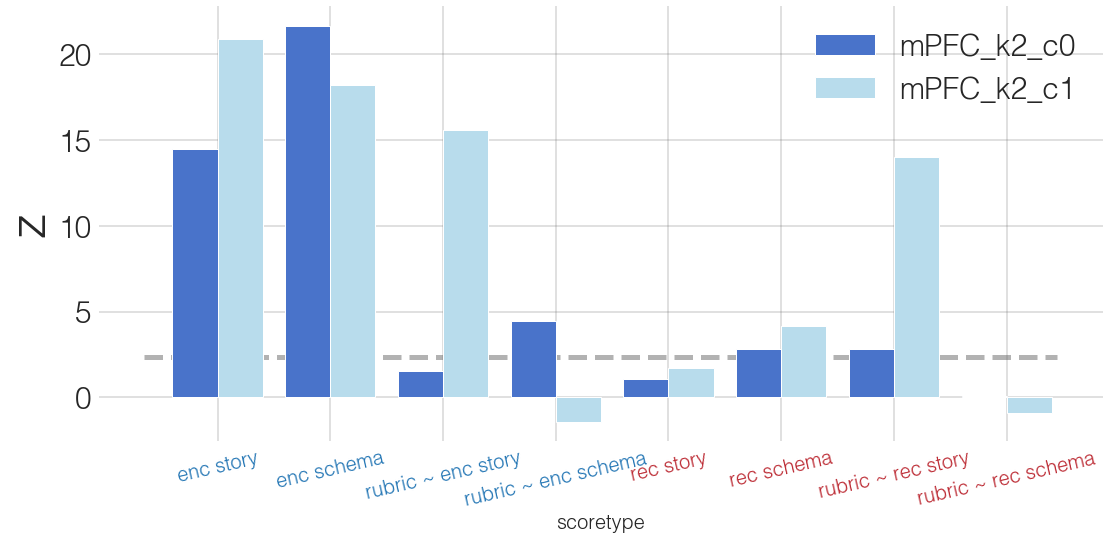

In [53]:
df2 = df[df.sig != False]


plt.figure(figsize=(18,8))

barcolors = ['#f08a5d', '#b83b5e', '#6a2c70']
barcolors = ['#AFDFF5', '#8BB4EC', '#336BE0']
barcolors = ['#AFDFF5', '#336BE0'] #og
barcolors = ['#336BE0', '#AFDFF5']  #flip 20211102
blue= "#2275b4"
red = "#bc2a33"

plt.rcParams["font.family"] = "Helvetica-Light" # set default plot font to helvetica light
fontfam = {'fontname':'Helvetica-Light'}

ax = sns.barplot(x="scoretype", y="z", hue="roi", data=df,palette=barcolors)

plt.hlines(2.33,-.65,len(ax.get_xticks())-0.55,linestyles='dashed',linewidth=5,alpha=0.5,color='#666666', zorder=0)
# plt.hlines(-2.33,0,len(ax.get_xticks())-1,linestyles='dashed',alpha=0.5)

ticklabels = []
colors = []
for i,s in enumerate(df.scoretype.unique()):
    
    effect_name = s.split("_")[1] + " " + s.split("_")[3]
#     colors.append(matcolors.to_rgba('blue') if 'percept' in s else matcolors.to_rgba('red'))
    colors.append(blue if 'percept' in s else red)

    ticklabels.append("rubric ~ {}".format(effect_name) if 'predict' in s else effect_name)
    
#     h = df.z[df.roi=='mPFC_c1'].to_list()[i]+2
#     plt.annotate(ticklabels[i],(i,h),rotation=90,c=colors[i],fontsize=20)

    

# plt.setp(ax.get_xticklabels(), color=colors)
ticklabels = ['enc story', 'enc schema', 'rubric ~ enc story', 'rubric ~ enc schema',
             'rec story', 'rec schema', 'rubric ~ rec story', 'rubric ~ rec schema']
ax.set_xticklabels(ticklabels,c=colors,rotation=13,size=20,**fontfam) #, c=['red']*len(total_scoretypes))
ax.tick_params(axis='y', which='major', labelsize=30)

[ax.get_xticklabels()[i].set_color(colors[i]) for i in range(len(colors))]


ax.set_xlabel(ax.get_xlabel(),fontsize=20,**fontfam)
ax.set_ylabel(ax.get_ylabel(),fontsize=50,**fontfam)
plt.setp(ax.legend().get_texts(), fontsize=16)
ax.legend(fontsize=30, frameon=False)#, title_fontsize=16)
sns.despine(top=True, right=True, left=True, bottom=True)

plt.grid(b=True, which='both', axis='both',color='#666666', linestyle='-',linewidth=2,alpha=0.2,zorder=3)


sns.set_style("whitegrid")

plt.savefig(os.path.join('figs','mPFC_cluster_performance.png'),transparent=True,dpi=400)



# sns.set(font_scale = 2)
# plt.text(0.125,19,"this")

## Figure 5; mPFC results -- figure formatting for paper

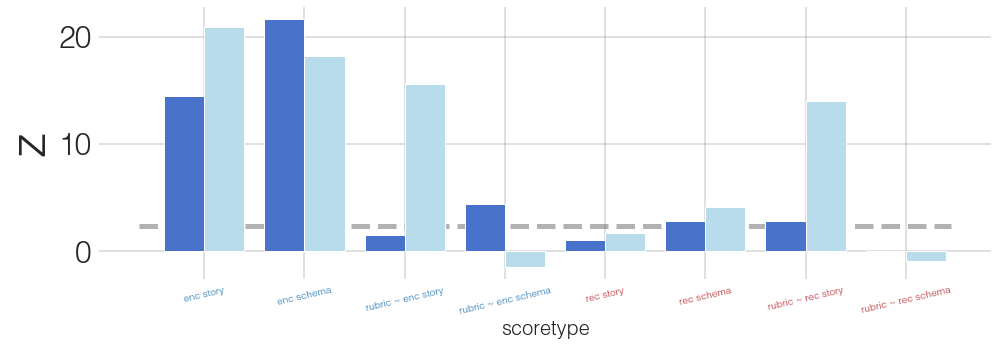

In [54]:
df2 = df[df.sig != False]



plt.figure(figsize=(16,5))

barcolors = ['#f08a5d', '#b83b5e', '#6a2c70']
barcolors = ['#AFDFF5', '#8BB4EC', '#336BE0']
barcolors = ['#AFDFF5', '#336BE0']
barcolors = ['#0E407B','#9CC8E3']
barcolors = ['#336BE0','#AFDFF5']
blue= "#2275b4"
red = "#bc2a33"

plt.rcParams["font.family"] = "Helvetica-Light" # set default plot font to helvetica light

ax = sns.barplot(x="scoretype", y="z", hue="roi", data=df,palette=barcolors)

plt.hlines(2.33,-.65,len(ax.get_xticks())-0.55,linestyles='dashed',linewidth=5,alpha=0.5,color='#666666', zorder=0)
# plt.hlines(-2.33,0,len(ax.get_xticks())-1,linestyles='dashed',alpha=0.5)

ticklabels = []
colors = []
for i,s in enumerate(df.scoretype.unique()):
    
    effect_name = s.split("_")[1] + " " + s.split("_")[3]
#     colors.append(matcolors.to_rgba('blue') if 'percept' in s else matcolors.to_rgba('red'))
    colors.append(blue if 'percept' in s else red)

    ticklabels.append("rubric ~ {}".format(effect_name) if 'predict' in s else effect_name)
    
#     h = df.z[df.roi=='mPFC_c1'].to_list()[i]+2
#     plt.annotate(ticklabels[i],(i,h),rotation=90,c=colors[i],fontsize=20)

    

# plt.setp(ax.get_xticklabels(), color=colors)
ticklabels = ['enc story', 'enc schema', 'rubric ~ enc story', 'rubric ~ enc schema',
             'rec story', 'rec schema', 'rubric ~ rec story', 'rubric ~ rec schema']
ax.set_xticklabels(ticklabels,c=colors,rotation=13,size=10,**fontfam) #, c=['red']*len(total_scoretypes))
ax.tick_params(axis='y', which='major', labelsize=30)

[ax.get_xticklabels()[i].set_color(colors[i]) for i in range(len(colors))]



ax.set_xlabel(ax.get_xlabel(),fontsize=20,**fontfam)
ax.set_ylabel(ax.get_ylabel(),fontsize=50,**fontfam)

# ax.axes.get_xaxis().set_visible(False)
# ax.axes.get_yaxis().set_visible(False)
# ax.axes.get_xaxis().set_ticks([])

plt.setp(ax.legend().get_texts(), fontsize=16)
ax.legend(fontsize=30, frameon=False)#, title_fontsize=16)
ax.get_legend().remove()
sns.despine(top=True, right=True, left=True, bottom=True)

plt.grid(b=True, which='both', axis='both',color='#666666', linestyle='-',linewidth=2,alpha=0.2,zorder=3)


sns.set_style("whitegrid")

plt.savefig(os.path.join('figs','mPFC_cluster_performance_short.png'),transparent=True,dpi=400)



# sns.set(font_scale = 2)
# plt.text(0.125,19,"this")

In [44]:
.05/8

0.00625

In [45]:
import scipy.stats as stats

In [61]:
stats.norm.ppf(.99)

2.3263478740408408

In [62]:
1 - stats.norm.ppf(.00625)

3.497705474412373